# Metallome / Metalloproteomic Visualization Tool
### Using *Pseudomonas aeruginosa* dataset
### Mak Saito, Fall 2024

#### Overview
This project explores the metalloproteomic dataset of *Pseudomonas aeruginosa* grown under both oxic and anoxic conditions. 

### 1. Metals: 3D comparisons - oxic and anoxic treatments

In [13]:
### Oxic and anoxic metals
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots


# Reading the Excel file and specific sheet
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0)
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0)

# Setting the first column (Sample_ID) as the index
m_oxic.set_index('Sample_ID', inplace=True)
m_anoxic.set_index('Sample_ID', inplace=True)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])


# Create Dropdown Menu for metals
metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    description='Metal:',
    disabled=False,
)

# Create Dropdown Menu for contour height
contour_height_dropdown = widgets.Dropdown(
    options=[0.8, 1, 1.2],
    description='Contour Height:',
    disabled=False,
)

# Define Plotting Function
def plot_metal(metal, contour_height_factor):
    # Creating a pivot table to reshape the data
    pivot_table = m_oxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal)
    pivot_table_ao = m_anoxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal)

    # Extracting the x, y, and z data from the pivot table
    X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
    Z = pivot_table.values
    X_ao, Y_ao = np.meshgrid(pivot_table_ao.columns, pivot_table_ao.index)
    Z_ao = pivot_table_ao.values
    
    # Define the height for the contour plot based on the selected factor
    z_min, z_max = np.min(Z), np.max(Z)
    contour_height = z_min + contour_height_factor * (z_max - z_min)
    z_min_ao, z_max_ao = np.min(Z_ao), np.max(Z_ao)
    contour_height_ao = z_min_ao + contour_height_factor * (z_max_ao - z_min_ao)

    # Add subplots
    # Creating subplots with Plotly
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'surface'}, {'type': 'surface'}]], subplot_titles=(f"Metal (oxic): {metal}", f"Metal (anoxic): {metal}"))
  
    # Creating the surface plot with Plotly
    #fig = go.Figure()

    # Add surface plot with a hotter color palette
    fig.add_trace(go.Surface(z=Z, x=X, y=Y, colorscale='Hot', showscale=False), row=1, col=1)
    fig.add_trace(go.Surface(z=Z_ao, x=X_ao, y=Y_ao, colorscale='Hot', showscale=False), row=1, col=2)

    # Add contour plot at a constant height above the surface
    fig.add_trace(go.Surface(
        z=np.ones_like(Z) * contour_height,
        x=X,
        y=Y,
        surfacecolor=Z,
        colorscale='Hot',
        showscale=False,
        opacity=0.6,  # Adjusted transparency
        contours=dict(
            x=dict(show=False, highlight=False),  # Remove grid lines
            y=dict(show=False, highlight=False),  # Remove grid lines
            z=dict(show=True, project=dict(z=True))
        )
    ),row=1, col=1)

    fig.add_trace(go.Surface(
        z=np.ones_like(Z_ao) * contour_height_ao,
        x=X_ao,
        y=Y_ao,
        surfacecolor=Z_ao,
        colorscale='Hot',
        showscale=False,
        opacity=0.6,  # Adjusted transparency
        contours=dict(
            x=dict(show=False, highlight=False),  # Remove grid lines
            y=dict(show=False, highlight=False),  # Remove grid lines
            z=dict(show=True, project=dict(z=True))
        )
    ),row=1, col=2)
 
    
    # Adding titles, labels, and setting different shades of grey for backgrounds
    fig.update_layout(
        title=metal,
        width=1150,  # Set the width of the figure
        height=600,  # Set the height of the figure
        scene=dict(
            xaxis_title='AE Fraction',
            yaxis_title='SE Fraction',
            zaxis_title=f'{metal}',
            xaxis=dict(showgrid=False, backgroundcolor='lightgrey'),
            yaxis=dict(showgrid=False, backgroundcolor='darkgrey'),
            zaxis=dict(showgrid=False, backgroundcolor='whitesmoke'),
            camera_eye=dict(x=1.5, y=1.5, z=1)
        )
    )
    fig.update_layout(
        title=metal,
        scene2=dict(
            xaxis_title='AE Fraction',
            yaxis_title='SE Fraction',
            zaxis_title=f'{metal}',
            xaxis=dict(showgrid=False, backgroundcolor='lightgrey'),
            yaxis=dict(showgrid=False, backgroundcolor='darkgrey'),
            zaxis=dict(showgrid=False, backgroundcolor='whitesmoke'),
            camera_eye=dict(x=1.5, y=1.5, z=1)
        )
    )

    # Display the plot
    fig.show()
    fig.write_html("metals_2panel_surface.html")
   

# Display Interactive Widgets
widgets.interact(plot_metal, metal=metal_dropdown, contour_height_factor=contour_height_dropdown)


interactive(children=(Dropdown(description='Metal:', options=('Al 27', 'As 75', 'Co 59', 'Cr 52', 'Cu 63', 'Fe…

<function __main__.plot_metal(metal, contour_height_factor)>

### 1b. Metals: 2D contour plots - oxic and anoxic treatments

In [15]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots

# Reading the Excel file and specific sheet
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0)
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0)

# Setting the first column (Sample_ID) as the index
m_oxic.set_index('Sample_ID', inplace=True)
m_anoxic.set_index('Sample_ID', inplace=True)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menu for metals
metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    description='Metal:',
    disabled=False,
)

# Define Plotting Function
def plot_metal(metal):
    # Creating a pivot table to reshape the data
    pivot_table = m_oxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal)
    pivot_table_ao = m_anoxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal)

    # Extracting the x, y, and z data from the pivot table
    X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
    Z = pivot_table.values
    X_ao, Y_ao = np.meshgrid(pivot_table_ao.columns, pivot_table_ao.index)
    Z_ao = pivot_table_ao.values

    # Define the height for the contour plot based on the selected factor
    z_min, z_max = np.min(Z), np.max(Z)
    z_min_ao, z_max_ao = np.min(Z_ao), np.max(Z_ao)
    
    # Add subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Metal (oxic): {metal}", f"Metal (anoxic): {metal}"))

    # Add contour plot for oxic metals without colorbar
    fig.add_trace(go.Contour(
        z=Z,
        x=X[0],
        y=Y[:, 0],
        colorscale='Hot',
        contours=dict(
            start=z_min,
            end=z_max,
            size=(z_max - z_min) / 10,
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=1, col=1)

    # Add contour plot for anoxic metals without colorbar
    fig.add_trace(go.Contour(
        z=Z_ao,
        x=X_ao[0],
        y=Y_ao[:, 0],
        colorscale='Hot',
        contours=dict(
            start=z_min_ao,
            end=z_max_ao,
            size=(z_max_ao - z_min_ao) / 10,
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=1, col=2)

    # Update layout for better visualization and separate legends
    fig.update_layout(
        #title=f"Contour Plot of {metal}",
        width=1150,
        height=600,
        xaxis_title='AE Fraction',
        yaxis_title='SE Fraction'
    )

    # Display the plot
    fig.show()

# Display Interactive Widgets
widgets.interact(plot_metal, metal=metal_dropdown)


interactive(children=(Dropdown(description='Metal:', options=('Al 27', 'As 75', 'Co 59', 'Cr 52', 'Cu 63', 'Fe…

<function __main__.plot_metal(metal)>

### 2a. Proteins: 2D contour plots oxic and anoxic treatments - need to clean up

In [17]:
# load proteins
# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_o = pr_o_annot.drop([0, 1])

pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
pr_ao = pr_ao_annot.drop([0, 1])

# Convert relevant columns to numeric types if necessary 
pr_o = pr_o.apply(pd.to_numeric, errors='ignore')
pr_ao = pr_ao.apply(pd.to_numeric, errors='ignore')

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]
pa_columns_ao = [col for col in pr_ao.columns if col.startswith('PA')]

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    #options=sorted(pa_columns),  # Sort the PA#### oxic columns, commented out for anoxic only
    options=sorted(pa_columns_ao),  # Sort the PA#### anoxic columns
    description='Protein:',
    disabled=False,
)

def plot_data(protein, metal):
    # Creating a pivot table to reshape the protein data
    protein_pivot_table = pr_o.pivot(index='SE Fraction', columns='AE Fraction', values=protein) 
    #protein_pivot_table = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein) # commented out for oxic only
    X_protein, Y_protein = np.meshgrid(protein_pivot_table.columns, protein_pivot_table.index)
    Z_protein = protein_pivot_table.values

    protein_pivot_table_ao = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein) 
    #protein_pivot_table = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein) # commented out for oxic only
    X_protein_ao, Y_protein_ao = np.meshgrid(protein_pivot_table_ao.columns, protein_pivot_table_ao.index)
    Z_protein_ao = protein_pivot_table_ao.values

    # Creating a pivot table to reshape the metal data
    metal_pivot_table = m_oxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal) 
    #metal_pivot_table = m_anoxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal) #  commented out for oxic only
    X_metal, Y_metal = np.meshgrid(metal_pivot_table.columns, metal_pivot_table.index)
    Z_metal = metal_pivot_table.values

    # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_o_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
    # Combine the gene id# and annotation 
    #combined_text = f"{protein} - {processed_text}"
    combined_text = f"{protein} - {processed_text} (oxic)"
    # Define the height for the contour plot based on the selected factor
    z_min_protein, z_max_protein = np.min(Z_protein), np.max(Z_protein)
   
    z_min_metal, z_max_metal = np.min(Z_metal), np.max(Z_metal)
   
     # Add subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Protein (oxic): {protein}", f"Protein (anoxic): {protein}"))

    # Add protein surface plot with a hotter color palette
    #fig.add_trace(go.Surface(z=Z_protein, x=X_protein, y=Y_protein, colorscale='Hot', showscale=False), row=1, col=1)

    # Add protein contour plot at a constant height above the surface
    fig.add_trace(go.Contour(
        #z=Z_ao,
        #x=X_ao[0],
        #y=Y_ao[:, 0],
        z=Z_protein,
        x=X_protein[0],
        y=Y_protein[:, 0],
        colorscale='Hot',
        contours=dict(
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=1, col=1)
    
    fig.add_trace(go.Contour(
        #z=Z_ao,
        #x=X_ao[0],
        #y=Y_ao[:, 0],
        z=Z_protein_ao,
        x=X_protein_ao[0],
        y=Y_protein_ao[:, 0],
        colorscale='Hot',
        contours=dict(
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=1, col=2)
    
  # Update layout for better visualization and separate legends
    fig.update_layout(
        title=f"Contour Plot of {metal}",
        width=1150,
        height=600,
        xaxis_title='AE Fraction',
        yaxis_title='SE Fraction'
    )

    # Display the plot
    fig.show()
    
# Display Interactive Widgets
widgets.interact(plot_data, protein=protein_dropdown, metal=metal_dropdown)

interactive(children=(Dropdown(description='Protein:', options=('PA0001', 'PA0002', 'PA0004', 'PA0008', 'PA000…

<function __main__.plot_data(protein, metal)>

### 3a. Proteins and Metals:2D contour plots, Oxic and Anoxic Working

In [19]:
# load proteins
# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_o = pr_o_annot.drop([0, 1])

pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
pr_ao = pr_ao_annot.drop([0, 1])

# Convert relevant columns to numeric types if necessary 
pr_o = pr_o.apply(pd.to_numeric, errors='ignore')
pr_ao = pr_ao.apply(pd.to_numeric, errors='ignore')

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]
pa_columns_ao = [col for col in pr_ao.columns if col.startswith('PA')]

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    #options=sorted(pa_columns),  # Sort the PA#### oxic columns, commented out for anoxic only
    options=sorted(pa_columns_ao),  # Sort the PA#### anoxic columns
    description='Protein:',
    disabled=False,
)

def plot_data(protein, metal):
    # Creating a pivot table to reshape the protein data
    protein_pivot_table = pr_o.pivot(index='SE Fraction', columns='AE Fraction', values=protein) 
    #protein_pivot_table = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein) # commented out for oxic only
    X_protein, Y_protein = np.meshgrid(protein_pivot_table.columns, protein_pivot_table.index)
    Z_protein = protein_pivot_table.values

    protein_pivot_table_ao = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein) 
    #protein_pivot_table = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein) # commented out for oxic only
    X_protein_ao, Y_protein_ao = np.meshgrid(protein_pivot_table_ao.columns, protein_pivot_table_ao.index)
    Z_protein_ao = protein_pivot_table_ao.values

    # Creating a pivot table to reshape the metal data
    metal_pivot_table = m_oxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal) 
    #metal_pivot_table = m_anoxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal) #  commented out for oxic only
    X_metal, Y_metal = np.meshgrid(metal_pivot_table.columns, metal_pivot_table.index)
    Z_metal = metal_pivot_table.values

    # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_o_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
    # Combine the gene id# and annotation 
    #combined_text = f"{protein} - {processed_text}"
    combined_text = f"{protein} - {processed_text} (oxic)"
    # Define the height for the contour plot based on the selected factor
    z_min_protein, z_max_protein = np.min(Z_protein), np.max(Z_protein)
    z_min_metal, z_max_metal = np.min(Z_metal), np.max(Z_metal)
   
    # Creating a pivot table to reshape the data
    pivot_table = m_oxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal)
    pivot_table_ao = m_anoxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal)

    # Extracting the x, y, and z data from the pivot table
    X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
    Z = pivot_table.values
    X_ao, Y_ao = np.meshgrid(pivot_table_ao.columns, pivot_table_ao.index)
    Z_ao = pivot_table_ao.values

    # Define the height for the contour plot based on the selected factor
    z_min, z_max = np.min(Z), np.max(Z)
    z_min_ao, z_max_ao = np.min(Z_ao), np.max(Z_ao)
    
    
    # Add subplots
    fig = make_subplots(rows=2, cols=2, subplot_titles=(f"Metal (oxic): {metal}", f"Metal (anoxic): {metal}",
                                                        f"Protein {protein} (oxic)", f"Protein {protein} (anoxic)"))
    
    # Add contour plot for oxic metals without colorbar
    fig.add_trace(go.Contour(
        z=Z,
        x=X[0],
        y=Y[:, 0],
        colorscale='Hot',
        contours=dict(
            start=z_min,
            end=z_max,
            size=(z_max - z_min) / 10,
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=1, col=1)

    # Add contour plot for anoxic metals without colorbar
    fig.add_trace(go.Contour(
        z=Z_ao,
        x=X_ao[0],
        y=Y_ao[:, 0],
        colorscale='Hot',
        contours=dict(
            start=z_min_ao,
            end=z_max_ao,
            size=(z_max_ao - z_min_ao) / 10,
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=1, col=2)



    
    # Add protein contour plot at a constant height above the surface
    fig.add_trace(go.Contour(
        #z=Z_ao,
        #x=X_ao[0],
        #y=Y_ao[:, 0],
        z=Z_protein,
        x=X_protein[0],
        y=Y_protein[:, 0],
        colorscale='Hot',
        contours=dict(
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=2, col=1)
    
    fig.add_trace(go.Contour(
        #z=Z_ao,
        #x=X_ao[0],
        #y=Y_ao[:, 0],
        z=Z_protein_ao,
        x=X_protein_ao[0],
        y=Y_protein_ao[:, 0],
        colorscale='Hot',
        contours=dict(
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=2, col=2)
    
  # Update layout for better visualization and separate legends
    fig.update_layout(
        title=f"Contour Plot of {metal}",
        width=1150,
        height=800,
        xaxis_title='AE Fraction',
        yaxis_title='SE Fraction'
    )
    # Set the x-axis and y-axis range for all subplots
    #fig.update_xaxes(range=[100, 1000])
    fig.update_xaxes(range=[100, 600])
    fig.update_yaxes(range=[7,38])
    # Display the plot
    fig.show()
   
    
# Display Interactive Widgets
widgets.interact(plot_data, protein=protein_dropdown, metal=metal_dropdown)

interactive(children=(Dropdown(description='Protein:', options=('PA0001', 'PA0002', 'PA0004', 'PA0008', 'PA000…

<function __main__.plot_data(protein, metal)>

### 3b. Protein and Metals: 3D plots side by side, selectable (oxic)

In [21]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots

# load metals
# Reading the Excel file and specific sheet
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0, engine='openpyxl')
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0, engine='openpyxl')

# Setting the first column (Sample_ID) as the index
m_oxic.set_index('Sample_ID', inplace=True)
m_anoxic.set_index('Sample_ID', inplace=True)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])

# load proteins
# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_o = pr_o_annot.drop([0, 1])

pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
pr_ao = pr_ao_annot.drop([0, 1])

# Convert relevant columns to numeric types if necessary 
pr_o = pr_o.apply(pd.to_numeric, errors='ignore')
pr_ao = pr_ao.apply(pd.to_numeric, errors='ignore')

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]
pa_columns_ao = [col for col in pr_ao.columns if col.startswith('PA')]

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    options=sorted(pa_columns),  # Sort the PA#### oxic columns
    #options=sorted(pa_columns_ao),  # Sort the PA#### anoxic columns, commented out for oxic only
    description='Protein:',
    disabled=False,
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    #options=sorted(metal_columns_ao),  # Sort the metal columns, commented out for oxic only
    description='Metal:',
    disabled=False,
)

contour_height_dropdown = widgets.Dropdown(
    options=[0.8, 1, 1.2],
    description='Contour Height:',
    disabled=False,
)

# Define Plotting Function
def plot_data(protein, metal, contour_height_factor):
    # Creating a pivot table to reshape the protein data
    protein_pivot_table = pr_o.pivot(index='SE Fraction', columns='AE Fraction', values=protein) 
    #protein_pivot_table = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein) # commented out for oxic only
    X_protein, Y_protein = np.meshgrid(protein_pivot_table.columns, protein_pivot_table.index)
    Z_protein = protein_pivot_table.values

    # Creating a pivot table to reshape the metal data
    metal_pivot_table = m_oxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal) 
    #metal_pivot_table = m_anoxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal) #  commented out for oxic only
    X_metal, Y_metal = np.meshgrid(metal_pivot_table.columns, metal_pivot_table.index)
    Z_metal = metal_pivot_table.values

    # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_o_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
    # Combine the gene id# and annotation 
    #combined_text = f"{protein} - {processed_text}"
    combined_text = f"{protein} - {processed_text} (oxic)"
    # Define the height for the contour plot based on the selected factor
    z_min_protein, z_max_protein = np.min(Z_protein), np.max(Z_protein)
    contour_height_protein = z_min_protein + contour_height_factor * (z_max_protein - z_min_protein)

    z_min_metal, z_max_metal = np.min(Z_metal), np.max(Z_metal)
    contour_height_metal = z_min_metal + contour_height_factor * (z_max_metal - z_min_metal)

    # Creating subplots with Plotly
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'surface'}, {'type': 'surface'}]], subplot_titles=(f"Protein: {protein}", f"Metal: {metal}"))

    # Add protein surface plot with a hotter color palette
    fig.add_trace(go.Surface(z=Z_protein, x=X_protein, y=Y_protein, colorscale='Hot', showscale=False), row=1, col=1)

    # Add protein contour plot at a constant height above the surface
    fig.add_trace(go.Surface(
        z=np.ones_like(Z_protein) * contour_height_protein,
        x=X_protein,
        y=Y_protein,
        surfacecolor=Z_protein,
        colorscale='Hot',
        showscale=False,
        opacity=0.6,
        contours=dict(
            x=dict(show=False, highlight=False),
            y=dict(show=False, highlight=False),
            z=dict(show=True, project=dict(z=True))
        )
    ), row=1, col=1)

    # Add metal surface plot with a hotter color palette
    fig.add_trace(go.Surface(z=Z_metal, x=X_metal, y=Y_metal, colorscale='Hot', showscale=False), row=1, col=2)

    # Add metal contour plot at a constant height above the surface
    fig.add_trace(go.Surface(
        z=np.ones_like(Z_metal) * contour_height_metal,
        x=X_metal,
        y=Y_metal,
        surfacecolor=Z_metal,
        colorscale='Hot',
        showscale=False,
        opacity=0.6,
        contours=dict(
            x=dict(show=False, highlight=False),
            y=dict(show=False, highlight=False),
            z=dict(show=True, project=dict(z=True))
        )
    ), row=1, col=2)

    # Update layout for subplots and set figure size
    fig.update_layout(
        title=combined_text,
        width=1150,  # Set the width of the figure
        height=600,  # Set the height of the figure
        scene=dict(
            xaxis_title='AE Fraction',
            yaxis_title='SE Fraction',
            zaxis_title=f'{protein}',
            xaxis=dict(showgrid=False, backgroundcolor='lightgrey'),
            yaxis=dict(showgrid=False, backgroundcolor='darkgrey'),
            zaxis=dict(showgrid=False, backgroundcolor='whitesmoke'),
            camera_eye=dict(x=1.5, y=1.5, z=1)
        ),
        scene2=dict(
            xaxis_title='AE Fraction',
            yaxis_title='SE Fraction',
            zaxis_title=f'{metal}',
            xaxis=dict(showgrid=False, backgroundcolor='lightgrey'),
            yaxis=dict(showgrid=False, backgroundcolor='darkgrey'),
            zaxis=dict(showgrid=False, backgroundcolor='whitesmoke'),
            camera_eye=dict(x=1.5, y=1.5, z=1)
        )
    )
    
    # Display the plot
    fig.show()
    fig.write_html("metals_proteins__dropdown_plot.html")
# Display Interactive Widgets
widgets.interact(plot_data, protein=protein_dropdown, metal=metal_dropdown, contour_height_factor=contour_height_dropdown)

interactive(children=(Dropdown(description='Protein:', options=('PA0001', 'PA0002', 'PA0004', 'PA0006', 'PA000…

<function __main__.plot_data(protein, metal, contour_height_factor)>

### 3c. Protein and Metals: 3D side by side, selectable (anoxic)

In [23]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots

# load metals
# Reading the Excel file and specific sheet
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0, engine='openpyxl')
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0, engine='openpyxl')

# Setting the first column (Sample_ID) as the index
m_oxic.set_index('Sample_ID', inplace=True)
m_anoxic.set_index('Sample_ID', inplace=True)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])

# load proteins
# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_o = pr_o_annot.drop([0, 1])

pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
pr_ao = pr_ao_annot.drop([0, 1])

# Convert relevant columns to numeric types if necessary 
pr_o = pr_o.apply(pd.to_numeric, errors='ignore')
pr_ao = pr_ao.apply(pd.to_numeric, errors='ignore')

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]
pa_columns_ao = [col for col in pr_ao.columns if col.startswith('PA')]

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    #options=sorted(pa_columns),  # Sort the PA#### oxic columns, commented out for anoxic only
    options=sorted(pa_columns_ao),  # Sort the PA#### anoxic columns
    description='Protein:',
    disabled=False,
)

metal_dropdown = widgets.Dropdown(
    #options=sorted(metal_columns),  # Sort the metal columns, commented out for anoxic only
    options=sorted(metal_columns_ao),  # Sort the metal columns
    description='Metal:',
    disabled=False,
)

contour_height_dropdown = widgets.Dropdown(
    options=[0.8, 1, 1.2],
    description='Contour Height:',
    disabled=False,
)

# Define Plotting Function
def plot_data(protein, metal, contour_height_factor):
    # Creating a pivot table to reshape the protein data
    #protein_pivot_table = pr_o.pivot(index='SE Fraction', columns='AE Fraction', values=protein) # commented out for anoxic only
    protein_pivot_table = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein)
    X_protein, Y_protein = np.meshgrid(protein_pivot_table.columns, protein_pivot_table.index)
    Z_protein = protein_pivot_table.values

    # Creating a pivot table to reshape the metal data
    #metal_pivot_table = m_oxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal) #  commented out for anoxic only
    metal_pivot_table = m_anoxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal)
    X_metal, Y_metal = np.meshgrid(metal_pivot_table.columns, metal_pivot_table.index)
    Z_metal = metal_pivot_table.values
   
    # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_ao_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
    # Combine the gene id# and annotation 
    combined_text = f"{protein} - {processed_text} (anoxic)"

    # Define the height for the contour plot based on the selected factor
    z_min_protein, z_max_protein = np.min(Z_protein), np.max(Z_protein)
    contour_height_protein = z_min_protein + contour_height_factor * (z_max_protein - z_min_protein)

    z_min_metal, z_max_metal = np.min(Z_metal), np.max(Z_metal)
    contour_height_metal = z_min_metal + contour_height_factor * (z_max_metal - z_min_metal)

    # Creating subplots with Plotly
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'surface'}, {'type': 'surface'}]], subplot_titles=(f"Protein: {protein}", f"Metal: {metal}"))

    # Add protein surface plot with a hotter color palette
    fig.add_trace(go.Surface(z=Z_protein, x=X_protein, y=Y_protein, colorscale='Hot', showscale=False), row=1, col=1)

    # Add protein contour plot at a constant height above the surface
    fig.add_trace(go.Surface(
        z=np.ones_like(Z_protein) * contour_height_protein,
        x=X_protein,
        y=Y_protein,
        surfacecolor=Z_protein,
        colorscale='Hot',
        showscale=False,
        opacity=0.6,
        contours=dict(
            x=dict(show=False, highlight=False),
            y=dict(show=False, highlight=False),
            z=dict(show=True, project=dict(z=True))
        )
    ), row=1, col=1)

    # Add metal surface plot with a hotter color palette
    fig.add_trace(go.Surface(z=Z_metal, x=X_metal, y=Y_metal, colorscale='Hot', showscale=False), row=1, col=2)

    # Add metal contour plot at a constant height above the surface
    fig.add_trace(go.Surface(
        z=np.ones_like(Z_metal) * contour_height_metal,
        x=X_metal,
        y=Y_metal,
        surfacecolor=Z_metal,
        colorscale='Hot',
        showscale=False,
        opacity=0.6,
        contours=dict(
            x=dict(show=False, highlight=False),
            y=dict(show=False, highlight=False),
            z=dict(show=True, project=dict(z=True))
        )
    ), row=1, col=2)

    # Update layout for subplots and set figure size
    fig.update_layout(
        title=combined_text,
        width=1150,  # Set the width of the figure
        height=600,  # Set the height of the figure
        scene=dict(
            xaxis_title='AE Fraction',
            yaxis_title='SE Fraction',
            zaxis_title=f'{protein}',
            xaxis=dict(showgrid=False, backgroundcolor='lightgrey'),
            yaxis=dict(showgrid=False, backgroundcolor='darkgrey'),
            zaxis=dict(showgrid=False, backgroundcolor='whitesmoke'),
            camera_eye=dict(x=1.5, y=1.5, z=1)
        ),
        scene2=dict(
            xaxis_title='AE Fraction',
            yaxis_title='SE Fraction',
            zaxis_title=f'{metal}',
            xaxis=dict(showgrid=False, backgroundcolor='lightgrey'),
            yaxis=dict(showgrid=False, backgroundcolor='darkgrey'),
            zaxis=dict(showgrid=False, backgroundcolor='whitesmoke'),
            camera_eye=dict(x=1.5, y=1.5, z=1)
        )
    )
    
    # Display the plot
    fig.show()
    fig.write_html("metals_proteins__dropdown_plot.html")
# Display Interactive Widgets
widgets.interact(plot_data, protein=protein_dropdown, metal=metal_dropdown, contour_height_factor=contour_height_dropdown)

interactive(children=(Dropdown(description='Protein:', options=('PA0001', 'PA0002', 'PA0004', 'PA0008', 'PA000…

<function __main__.plot_data(protein, metal, contour_height_factor)>

### 4a. Table: oxic proteins with maxima at 2D coordinates

In [25]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')

# Drop the first two rows
pr_o = pr_o_annot.drop([0, 1])

# Create a dataframe
df = pd.DataFrame(pr_o)

# Create a new table of maxima
# Initialize an empty list to store the results
results = []

# Iterate over each PA#### column
for col in df.columns:
    if col.startswith('PA'):
        # Convert column to numeric, forcing errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Find the index of the maximum value in the column while skipping NaN values
        max_idx = df[col].idxmax(skipna=True)
        # Pull protein annotations 
        raw_annotation = pr_o_annot[col].iloc[1]
        # Strip off the text before pipe '|'
        processed_text = raw_annotation.split('|')[-1].strip()
        # Append the result to the list
        results.append({
            'PA ID#': col,
            'AE Fraction': df.at[max_idx, 'AE Fraction'],
            'SE Fraction': df.at[max_idx, 'SE Fraction'],
            'Max_Value': df.at[max_idx, col],
            #'Protein Annotation': combined_text
            'Protein Annotation': processed_text
        })
        
# Create a new dataframe from the results
maxtable = pd.DataFrame(results)
df = maxtable

# Create Dropdown Menus
ae_fraction_unique = sorted(df['AE Fraction'].dropna().unique())
se_fraction_unique = sorted(df['SE Fraction'].dropna().unique())

ae_dropdown = widgets.Dropdown(
    options=ae_fraction_unique,
    description='AE Fraction:',
    disabled=False,
)
se_dropdown = widgets.Dropdown(
    options=se_fraction_unique,
    description='SE Fraction:',
)

# Define Plotting Function
#def find_maxima(ae_fraction, se_fraction):

def subset_table(ae_value, se_value):
    # Filter the dataframe based on AE Fraction and SE Fraction values
    subset_df = df[(df['AE Fraction'] == ae_value) & (df['SE Fraction'] == se_value)]
    
    # Display the subset table
    return subset_df
    print(subset_table)
   
# Display Interactive Widgets
widgets.interact(subset_table, ae_value=ae_dropdown, se_value=se_dropdown)

interactive(children=(Dropdown(description='AE Fraction:', options=(100.0, 200.0, 300.0, 400.0, 500.0, 600.0),…

<function __main__.subset_table(ae_value, se_value)>

### 4b. Table: anoxic proteins with maxima at 2D coordinates

In [27]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')

# Drop the first two rows
pr_o = pr_o_annot.drop([0, 1])
pr_ao = pr_ao_annot.drop([0, 1])

# Create a dataframe
df_ao = pd.DataFrame(pr_ao)
     
# Create a new table of maxima
# Initialize an empty list to store the results
results_ao = []

# Iterate over each PA#### column
for col in df_ao.columns:
    if col.startswith('PA'):
        # Convert column to numeric, forcing errors to NaN
        df_ao[col] = pd.to_numeric(df_ao[col], errors='coerce')
        # Find the index of the maximum value in the column while skipping NaN values
        max_idx_ao = df_ao[col].idxmax(skipna=True)
        raw_annotation_ao = pr_ao_annot[col].iloc[1]
        # Strip off the text before pipe '|'
        processed_text_ao = raw_annotation_ao.split('|')[-1].strip()
        # Append the result to the list
        results_ao.append({
            'PA ID#': col,
            'AE Fraction': df_ao.at[max_idx_ao, 'AE Fraction'],
            'SE Fraction': df_ao.at[max_idx_ao, 'SE Fraction'],
            'Max_Value': df_ao.at[max_idx_ao, col],
            #'Protein Annotation': combined_text
            'Protein Annotation': processed_text_ao
        })
        
# Create a new dataframe from the results
maxtable_ao = pd.DataFrame(results_ao)
df_ao = maxtable_ao

# Create Dropdown Menus
ae_fraction_unique_ao = sorted(df_ao['AE Fraction'].dropna().unique())
se_fraction_unique_ao = sorted(df_ao['SE Fraction'].dropna().unique())

ae_dropdown_ao = widgets.Dropdown(
    options=ae_fraction_unique_ao,
    description='AE Fraction:',
    disabled=False,
)
se_dropdown_ao = widgets.Dropdown(
    options=se_fraction_unique_ao,
    description='SE Fraction:',
)

# Define Plotting Function
#def find_maxima(ae_fraction, se_fraction):

def subset_table_ao(ae_value, se_value):
    # Filter the dataframe based on AE Fraction and SE Fraction values
    subset_df_ao = df_ao[(df_ao['AE Fraction'] == ae_value) & (df_ao['SE Fraction'] == se_value)]
    
    # Display the subset table
    return subset_df_ao
    print(subset_table_ao)
   
# Display Interactive Widgets
widgets.interact(subset_table_ao, ae_value=ae_dropdown_ao, se_value=se_dropdown_ao)

interactive(children=(Dropdown(description='AE Fraction:', options=(100.0, 200.0, 300.0, 400.0, 500.0, 600.0),…

<function __main__.subset_table_ao(ae_value, se_value)>

### 5a. 3 line plots oxic and anoxic with save figure option

In [29]:
### 3 Line protein and metal plot oxic and anoxic, grey line is metal maxima, save figure option
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots
import datetime

# Reading the Excel file and specific sheets
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0, engine='openpyxl')
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_o = pr_o_annot.drop([0, 1])

# Anoxic data
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0, engine='openpyxl')
pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
pr_ao = pr_ao_annot.drop([0, 1])

# Setting the first column (Sample_ID) as the index for metals data
m_oxic.set_index('Sample_ID', inplace=True)
m_anoxic.set_index('Sample_ID', inplace=True)

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]
pa_columns_ao = [col for col in pr_ao.columns if col.startswith('PA')]

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    options=sorted(pa_columns),  # Sort the PA#### columns
    description='Protein 1:',
    value = 'PA4366',
    disabled=False,
)

protein_dropdown2 = widgets.Dropdown(
    options=['None'] + sorted(pa_columns),  # Add 'None' option and sort the PA#### columns
    description='Protein 2:',
    value = 'PA3529',
    disabled=False,
)

protein_dropdown3 = widgets.Dropdown(
    options=['None'] + sorted(pa_columns),  # Add 'None' option and sort the PA#### columns
    description='Protein 3:',
    disabled=False,
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    value='Fe 56', # default to Fe 56
    description='Metal:',
    disabled=False,
)

ae_dropdown = widgets.Dropdown(
    options=[100, 200, 300, 400, 500, 600], # temp values
    value=300, # default to 300
    description='AE Fraction:',
    disabled=False,
)

y_offset_dropdown = widgets.Dropdown(
    options=[1, 1.35, 1.45],
    value=1.35, # default 
    description='Y axis offset:',
    disabled=False,
)

# Define Plotting Function
def plot_data(protein, protein2, protein3, metal, ae_fraction, y_offset):
    
    # Filter data for the specified AE fraction
    protein_data = pr_o[pr_o['AE Fraction'] == ae_fraction]
    metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction]
    protein_data_ao = pr_ao[pr_ao['AE Fraction'] == ae_fraction]
    metal_data_ao = m_anoxic[m_anoxic['AE Fraction'] == ae_fraction]

    # Create subplots with higher resolution
    fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(10, 7), dpi=300)  # 2x2 grid of subplots with higher resolution
    
    # Plot Protein Abundance for Protein 1 in oxic condition if it exists in the dataset
    if protein in pr_o.columns:
        raw_annotation = pr_o_annot[protein].iloc[1]
        processed_text = raw_annotation.split('|')[-1].strip() # Strip off the text before pipe '|'
        sns.lineplot(data=protein_data, x='SE Fraction', y=protein, marker='o', ax=ax1, label=f"{protein} ({processed_text})")
    
        if protein2 != 'None' and protein2 in pr_o.columns:
            raw_annotation2 = pr_o_annot[protein2].iloc[1]
            processed_text2 = raw_annotation2.split('|')[-1].strip()  # Strip off the text before pipe '|'
            sns.lineplot(data=protein_data, x='SE Fraction', y=protein2, marker='o', ax=ax1, label=f"{protein2} ({processed_text2})")
    
        if protein3 != 'None' and protein3 in pr_o.columns:
            raw_annotation3 = pr_o_annot[protein3].iloc[1]
            processed_text3 = raw_annotation3.split('|')[-1].strip()  # Strip off the text before pipe '|'
            sns.lineplot(data=protein_data, x='SE Fraction', y=protein3, marker='o', ax=ax1, label=f"{protein3} ({processed_text3})")
    
        ax1.set_xlabel(f"SE Fraction along AE Fraction {ae_fraction}")
        ax1.set_ylabel('Protein Spectral Counts')
        ax1.set_title('Oxic')  
        max_y_value = max(protein_data[[protein] + ([protein2] if protein2 != 'None' else []) + ([protein3] if protein3 != 'None' else [])].max())
        ax1.set_ylim(0, max_y_value * y_offset)
        ax1.set_xlim(8, 35)
        ax1.legend(loc='upper left', fontsize='small')
   
    # Plot Metal Abundance in oxic condition on the second subplot
    max_metal_se_fraction = metal_data.loc[metal_data[metal].idxmax(), 'SE Fraction']
    ax2.axvline(x=max_metal_se_fraction, color='grey', linestyle='--')
    ax1.axvline(x=max_metal_se_fraction, color='grey', linestyle='--')
    
    sns.lineplot(data=metal_data, x='SE Fraction', y=metal, marker='.', ax=ax2, color='b', label=metal)
    ax2.set_ylabel('Metal Abundance')
    ax2.set_xlabel(f"SE Fraction along AE Fraction {ae_fraction}")
    max_y_value_metal = metal_data[metal].max()
    ax2.set_ylim(0, max_y_value_metal * y_offset)
    ax2.set_xlim(8, 35)
    ax2.legend(loc='upper right', fontsize='small')

    # Plot Protein Abundance for Protein 1 in anoxic condition if it exists in the dataset
    if protein in pr_ao.columns:
        raw_annotation_ao = pr_ao_annot[protein].iloc[1]
        processed_text_ao = raw_annotation_ao.split('|')[-1].strip() # Strip off the text before pipe '|'
        sns.lineplot(data=protein_data_ao, x='SE Fraction', y=protein, marker='o', ax=ax3, label=f"{protein} ({processed_text_ao})")
    
        if protein2 != 'None' and protein2 in pr_ao.columns:
            raw_annotation2_ao = pr_ao_annot[protein2].iloc[1]
            processed_text2_ao = raw_annotation2_ao.split('|')[-1].strip()  # Strip off the text before pipe '|'
            sns.lineplot(data=protein_data_ao, x='SE Fraction', y=protein2, marker='o', ax=ax3, label=f"{protein2} ({processed_text2_ao})")
    
        if protein3 != 'None' and protein3 in pr_ao.columns:
            raw_annotation3_ao = pr_ao_annot[protein3].iloc[1]
            processed_text3_ao = raw_annotation3_ao.split('|')[-1].strip()  # Strip off the text before pipe '|'
            sns.lineplot(data=protein_data_ao, x='SE Fraction', y=protein3, marker='o', ax=ax3, label=f"{protein3} ({processed_text3_ao})")
    
        ax3.set_xlabel(f"SE Fraction along AE Fraction {ae_fraction}")
        ax3.set_ylabel('Protein Spectral Counts')
        ax3.set_title('Anoxic')      
        max_y_value_ao = max(protein_data_ao[[protein] + ([protein2] if protein2 != 'None' else []) + ([protein3] if protein3 != 'None' else [])].max())
        ax3.set_ylim(0, max_y_value_ao * y_offset)
        ax3.set_xlim(8, 35)
        ax3.legend(loc='upper left', fontsize='small')

    # Plot Metal Abundance in anoxic condition on the fourth subplot
    max_metal_se_fraction_ao = metal_data_ao.loc[metal_data_ao[metal].idxmax(), 'SE Fraction']
    ax4.axvline(x=max_metal_se_fraction_ao, color='grey', linestyle='--')
    ax3.axvline(x=max_metal_se_fraction_ao, color='grey', linestyle='--')
    sns.lineplot(data=metal_data_ao, x='SE Fraction', y=metal, marker='.', ax=ax4, color='b', label=metal)
    ax4.set_ylabel('Metal Abundance')
    ax4.set_xlabel(f"SE Fraction along AE Fraction {ae_fraction}")
    max_y_value_metal_ao = metal_data_ao[metal].max()
    ax4.set_ylim(0, max_y_value_metal_ao * y_offset)
    ax4.set_xlim(8, 35)
    ax4.legend(loc='upper right', fontsize='small')

    # Generate a unique filename with AE fraction, metal, and timestamp included as suffixes
    timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
    filename = f"figure_AE{ae_fraction}_Metal{metal}_PA{timestamp}.jpg"
    
    # Save the figure as a jpg file with higher resolution
    plt.savefig(filename, format='jpg', dpi=300)
    
    # Show the plot
    plt.show()

# Function to save the figure
def save_figure(protein, protein2, protein3, metal, ae_fraction, y_offset):
    plot_data(protein, protein2, protein3, metal, ae_fraction, y_offset)

# Create a button widget
save_button = widgets.Button(description="Save Figure")

# Define the button click event
def on_button_click(b):
    save_figure(protein_dropdown.value, protein_dropdown2.value, protein_dropdown3.value, metal_dropdown.value, ae_dropdown.value, y_offset_dropdown.value)

# Assign the button click event
save_button.on_click(on_button_click)

# Display the button
display(save_button)

# Display Interactive Widgets
widgets.interact(plot_data, ae_fraction=ae_dropdown, metal=metal_dropdown, protein=protein_dropdown,
                 protein2=protein_dropdown2, protein3=protein_dropdown3, y_offset=y_offset_dropdown)

Button(description='Save Figure', style=ButtonStyle())

interactive(children=(Dropdown(description='Protein 1:', index=1035, options=('PA0001', 'PA0002', 'PA0004', 'P…

<function __main__.plot_data(protein, protein2, protein3, metal, ae_fraction, y_offset)>

### 6. Optimization of protein peaks to metal peak in 1D

In [31]:
### Table of selected proteins for use in optimization, ANOXIC
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0, engine='openpyxl')
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0, engine='openpyxl')

# Drop the first two rows
pr_o = pr_o_annot.drop([0, 1])
pr_ao = pr_ao_annot.drop([0, 1])

# Create a dataframe
df_ao = pd.DataFrame(pr_ao)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menus
ae_fraction_unique_ao = sorted(df_ao['AE Fraction'].dropna().unique())
se_fraction_unique_ao = sorted(df_ao['SE Fraction'].dropna().unique())

ae_dropdown_ao = widgets.Dropdown(
    options=ae_fraction_unique_ao,
    description='AE Fraction:',
    disabled=False,
)
se_dropdown_ao = widgets.Dropdown(
    options=se_fraction_unique_ao,
    description='SE Fraction:',
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    value='Fe 56', # default to Fe 56
    description='Metal:',
    disabled=False,
)

# Sort protein columns in sequential order (e.g., PA0001, PA0002, ...)
protein_columns = sorted([col for col in df_ao.columns if col.startswith('PA')])
protein_columns.insert(0, '<no protein>')

# Define the function to display the table
def display_table(protein1, protein2, protein3, protein4, ae_fraction, metal):
    # Filter data for the specified AE fraction
    filtered_data = df_ao[df_ao['AE Fraction'] == ae_fraction]
    
    # Select the columns for the specified proteins and SE Fraction
    selected_columns = ['AE Fraction', 'SE Fraction']
    
    # Add selected proteins to the columns if they are not '<no protein>'
    proteins = []
    if protein1 != '<no protein>':
        selected_columns.append(protein1)
        proteins.append(protein1)
    if protein2 != '<no protein>':
        selected_columns.append(protein2)
        proteins.append(protein2)
    if protein3 != '<no protein>':
        selected_columns.append(protein3)
        proteins.append(protein3)
    if protein4 != '<no protein>':
        selected_columns.append(protein4)
        proteins.append(protein4)
    
    # Display the table without the index column
    table_to_display = filtered_data[selected_columns].reset_index(drop=True)
    
    # Add a column that sums the four proteins
    if proteins:
        table_to_display['Sum'] = table_to_display[proteins].sum(axis=1, skipna=True)
    
    # Add metal data for the relevant AE fraction
    metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction][['SE Fraction', metal]].reset_index(drop=True)
    table_to_display = pd.merge(table_to_display, metal_data, on='SE Fraction', how='left')
    
    display(table_to_display)

# Create dropdown widgets for proteins and AE fraction
protein_dropdown1 = widgets.Dropdown(options=protein_columns, description='Protein 1:')
protein_dropdown2 = widgets.Dropdown(options=protein_columns, description='Protein 2:')
protein_dropdown3 = widgets.Dropdown(options=protein_columns, description='Protein 3:')
protein_dropdown4 = widgets.Dropdown(options=protein_columns, description='Protein 4:')

# Display Interactive Widgets
widgets.interact(display_table, 
                 protein1=protein_dropdown1, 
                 protein2=protein_dropdown2, 
                 protein3=protein_dropdown3, 
                 protein4=protein_dropdown4, 
                 ae_fraction=ae_dropdown_ao,
                 metal=metal_dropdown)


interactive(children=(Dropdown(description='Protein 1:', options=('<no protein>', 'PA0001', 'PA0002', 'PA0004'…

<function __main__.display_table(protein1, protein2, protein3, protein4, ae_fraction, metal)>

Optimized coefficients: [  25.72762591  154.64774967 3017.14353712  183.19530514]
Percent contributions of each protein to the Fe56 peak:
PA1787: 17.89%
PA2009: 28.66%
PA3531: 48.98%
PA4235: 4.46%


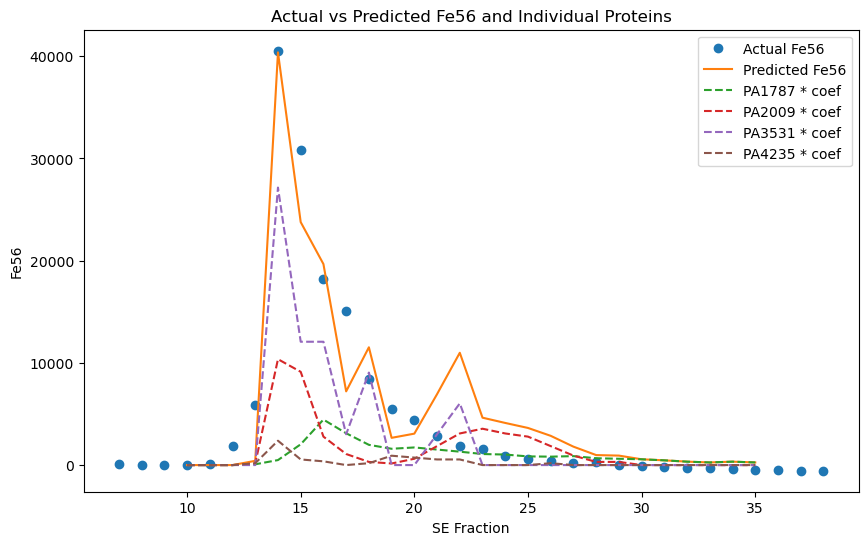

In [32]:
# Optimization function on peak 1 anoxic iron peaks
import pandas as pd
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

# Define the data
data = {
    "AE Fraction": [400.0] * 32,
    "SE Fraction": [7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0],
    "PA1787": [np.nan, np.nan, np.nan, 0.0, 0.0, 0.0, 3.0, 19.0, 79.0, 173.0, 121.0, 77.0, 62.0, 67.0, 59.0, 51.0, 42.0, 40.0, 33.0, 32.0, 34.0, 26.0, 24.0, 22.0, 18.0, 13.0, 10.0, 13.0, 10.0, np.nan, np.nan, np.nan],
    "PA2009": [np.nan, np.nan, np.nan, 0.0, 0.0, 0.0, 1.0, 67.0, 59.0, 18.0, 7.0, 2.0, 1.0, 4.0, 12.0, 20.0, 23.0, 20.0, 18.0, 12.0, 6.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.nan, np.nan, np.nan],
    "PA3531": [np.nan, np.nan, np.nan, 0.0, 0.0, 0.0, 0.0, 9.0, 4.0, 4.0, 1.0, 3.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.nan, np.nan, np.nan],
    "PA4235": [np.nan, np.nan, np.nan, 0.0, 0.0, 0.0, 1.0, 13.0, 3.0, 2.0, 0.0, 1.0, 5.0, 4.0, 3.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.nan, np.nan, np.nan],
    "Fe56": [109.853006, -19.322896, 38.144333, -18.821437, 83.877417, 1830.058804, 5893.082203, 40545.019340, 30871.569601, 18180.538701, 15084.328730, 8396.166177, 5480.982994, 4418.992602, 2799.178944, 1886.623407, 1551.147172, 847.499557, 587.843959, 412.533807, 226.592718, 296.094970, 17.083045, -83.609972, -210.077994, -315.384435, -319.095234, -386.491357, -487.585541, -504.434571, -552.775243, -550.468530]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define the objective function to minimize
def objective(x):
    return np.nansum((x[0]*df['PA1787'] + x[1]*df['PA2009'] + x[2]*df['PA3531'] + x[3]*df['PA4235'] - df['Fe56'])**2)

# Initial guess for the coefficients
x0 = [1, 1, 1, 1]

# Define bounds to ensure non-negative coefficients
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Perform the optimization
result = minimize(objective, x0, method='L-BFGS-B', bounds=bounds)

# Print the optimized coefficients
print("Optimized coefficients:", result.x)

# Calculate the predicted Fe56 values using the optimized coefficients
predicted_Fe56 = result.x[0]*df['PA1787'] + result.x[1]*df['PA2009'] + result.x[2]*df['PA3531'] + result.x[3]*df['PA4235']

# Calculate the percent contribution of each protein to the Fe56 peak
total_contribution = np.nansum(predicted_Fe56)
percent_contributions = {
    'PA1787': np.nansum(result.x[0]*df['PA1787']) / total_contribution * 100,
    'PA2009': np.nansum(result.x[1]*df['PA2009']) / total_contribution * 100,
    'PA3531': np.nansum(result.x[2]*df['PA3531']) / total_contribution * 100,
    'PA4235': np.nansum(result.x[3]*df['PA4235']) / total_contribution * 100
}

print("Percent contributions of each protein to the Fe56 peak:")
for protein, contribution in percent_contributions.items():
    print(f"{protein}: {contribution:.2f}%")

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(df['SE Fraction'], df['Fe56'], 'o', label='Actual Fe56')
plt.plot(df['SE Fraction'], predicted_Fe56, '-', label='Predicted Fe56')

# Plot individual proteins after being multiplied by their coefficients
plt.plot(df['SE Fraction'], result.x[0]*df['PA1787'], '--', label='PA1787 * coef')
plt.plot(df['SE Fraction'], result.x[1]*df['PA2009'], '--', label='PA2009 * coef')
plt.plot(df['SE Fraction'], result.x[2]*df['PA3531'], '--', label='PA3531 * coef')
plt.plot(df['SE Fraction'], result.x[3]*df['PA4235'], '--', label='PA4235 * coef')

plt.xlabel('SE Fraction')
plt.ylabel('Fe56')
plt.legend()
plt.title('Actual vs Predicted Fe56 and Individual Proteins')
plt.show()

Optimized coefficients: [  25.72762591  154.64774967 3017.14353712  183.19530514]
Percent contributions of each protein to the Fe56 peak:
PA1787: 17.89%
PA2009: 28.66%
PA3531: 48.98%
PA4235: 4.46%


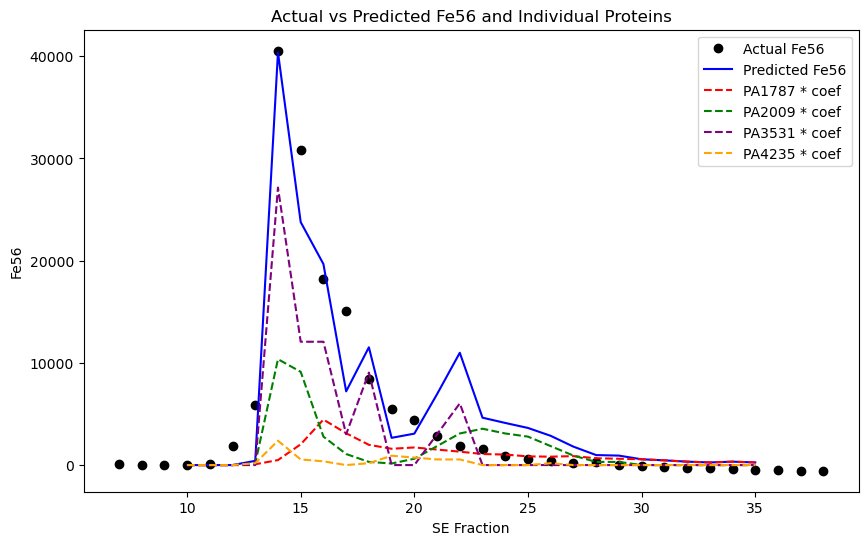

In [33]:
### version for oxic proteins optimization scheme
import pandas as pd
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

# Define the data
data = {
    "AE Fraction": [400.0] * 32,
    "SE Fraction": [7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0],
    "PA1787": [np.nan, np.nan, np.nan, 0.0, 0.0, 0.0, 3.0, 19.0, 79.0, 173.0, 121.0, 77.0, 62.0, 67.0, 59.0, 51.0, 42.0, 40.0, 33.0, 32.0, 34.0, 26.0, 24.0, 22.0, 18.0, 13.0, 10.0, 13.0, 10.0, np.nan, np.nan, np.nan],
    "PA2009": [np.nan, np.nan, np.nan, 0.0, 0.0, 0.0, 1.0, 67.0, 59.0, 18.0, 7.0, 2.0, 1.0, 4.0, 12.0, 20.0, 23.0, 20.0, 18.0, 12.0, 6.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.nan, np.nan, np.nan],
    "PA3531": [np.nan, np.nan, np.nan, 0.0, 0.0, 0.0, 0.0, 9.0, 4.0, 4.0, 1.0, 3.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.nan, np.nan, np.nan],
    "PA4235": [np.nan, np.nan, np.nan, 0.0, 0.0, 0.0, 1.0, 13.0, 3.0, 2.0, 0.0, 1.0, 5.0, 4.0, 3.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.nan, np.nan, np.nan],
    "Fe56": [109.853006, -19.322896, 38.144333, -18.821437, 83.877417, 1830.058804, 5893.082203, 40545.019340, 30871.569601, 18180.538701, 15084.328730, 8396.166177, 5480.982994, 4418.992602, 2799.178944, 1886.623407, 1551.147172, 847.499557, 587.843959, 412.533807, 226.592718, 296.094970, 17.083045, -83.609972, -210.077994, -315.384435, -319.095234, -386.491357, -487.585541, -504.434571, -552.775243, -550.468530]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define the objective function to minimize
def objective(x):
    return np.nansum((x[0]*df['PA1787'] + x[1]*df['PA2009'] + x[2]*df['PA3531'] + x[3]*df['PA4235'] - df['Fe56'])**2)

# Initial guess for the coefficients
x0 = [1, 1, 1, 1]

# Define bounds to ensure non-negative coefficients
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Perform the optimization
result = minimize(objective, x0, method='L-BFGS-B', bounds=bounds)

# Print the optimized coefficients
print("Optimized coefficients:", result.x)

# Calculate the predicted Fe56 values using the optimized coefficients
predicted_Fe56 = result.x[0]*df['PA1787'] + result.x[1]*df['PA2009'] + result.x[2]*df['PA3531'] + result.x[3]*df['PA4235']

# Calculate the percent contribution of each protein to the Fe56 peak
total_contribution = np.nansum(predicted_Fe56)
percent_contributions = {
    'PA1787': np.nansum(result.x[0]*df['PA1787']) / total_contribution * 100,
    'PA2009': np.nansum(result.x[1]*df['PA2009']) / total_contribution * 100,
    'PA3531': np.nansum(result.x[2]*df['PA3531']) / total_contribution * 100,
    'PA4235': np.nansum(result.x[3]*df['PA4235']) / total_contribution * 100
}

print("Percent contributions of each protein to the Fe56 peak:")
for protein, contribution in percent_contributions.items():
    print(f"{protein}: {contribution:.2f}%")

# Plot the results with nicer colors for proteins
plt.figure(figsize=(10,6))
plt.plot(df['SE Fraction'], df['Fe56'], 'o', label='Actual Fe56', color='black')
plt.plot(df['SE Fraction'], predicted_Fe56, '-', label='Predicted Fe56', color='blue')

# Plot individual proteins after being multiplied by their coefficients with nicer colors
plt.plot(df['SE Fraction'], result.x[0]*df['PA1787'], '--', label='PA1787 * coef', color='red')
plt.plot(df['SE Fraction'], result.x[1]*df['PA2009'], '--', label='PA2009 * coef', color='green')
plt.plot(df['SE Fraction'], result.x[2]*df['PA3531'], '--', label='PA3531 * coef', color='purple')
plt.plot(df['SE Fraction'], result.x[3]*df['PA4235'], '--', label='PA4235 * coef', color='orange')

plt.xlabel('SE Fraction')
plt.ylabel('Fe56')
plt.legend()
plt.title('Actual vs Predicted Fe56 and Individual Proteins')
plt.show()


### Extra cells

### test additive peaks

In [36]:
### Table of selected proteins for use in optimization, OXIC
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from scipy.optimize import minimize

# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0, engine='openpyxl')
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0, engine='openpyxl')

# Drop the first two rows
pr_o = pr_o_annot.drop([0, 1])
pr_ao = pr_ao_annot.drop([0, 1])

# Create a dataframe
df_o = pd.DataFrame(pr_o)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns_o = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menus
ae_fraction_unique_o = sorted(df_o['AE Fraction'].dropna().unique())
se_fraction_unique_o = sorted(df_o['SE Fraction'].dropna().unique())

ae_dropdown_o = widgets.Dropdown(
    options=ae_fraction_unique_o,
    value=400.0,
    description='AE Fraction:',
    disabled=False,
)
se_dropdown_o = widgets.Dropdown(
    options=se_fraction_unique_o,
    description='SE Fraction:',
)

metal_dropdown_o = widgets.Dropdown(
    options=sorted(metal_columns_o),  # Sort the metal columns
    value='Fe 56', # default to Fe 56
    description='Metal:',
    disabled=False,
)

# Sort protein columns in sequential order (e.g., PA0001, PA0002, ...)
protein_columns = sorted([col for col in df_o.columns if col.startswith('PA')])
protein_columns.insert(0, '<no protein>')

# Define the function to display the table
def display_table(protein1, protein2, protein3, protein4, ae_fraction, metal, scalar1, scalar2, scalar3, scalar4):
    # Filter data for the specified AE fraction
    filtered_data = df_o[df_o['AE Fraction'] == ae_fraction].copy()
    
    # Select the columns for the specified proteins and SE Fraction
    selected_columns = ['AE Fraction', 'SE Fraction']
    
    # Add selected proteins to the columns if they are not '<no protein>'
    proteins = []
    scalars = []
    if protein1 != '<no protein>':
        if protein1 in filtered_data.columns:
            selected_columns.append(protein1)
            proteins.append(protein1)
            scalars.append(scalar1)
        else:
            filtered_data.loc[:, protein1] = float('nan')
    if protein2 != '<no protein>':
        if protein2 in filtered_data.columns:
            selected_columns.append(protein2)
            proteins.append(protein2)
            scalars.append(scalar2)
        else:
            filtered_data.loc[:, protein2] = float('nan')
    if protein3 != '<no protein>':
        if protein3 in filtered_data.columns:
            selected_columns.append(protein3)
            proteins.append(protein3)
            scalars.append(scalar3)
        else:
            filtered_data.loc[:, protein3] = float('nan')
    if protein4 != '<no protein>':
        if protein4 in filtered_data.columns:
            selected_columns.append(protein4)
            proteins.append(protein4)
            scalars.append(scalar4)
        else:
            filtered_data.loc[:, protein4] = float('nan')
    
    # Display the table without the index column
    table_to_display = filtered_data[selected_columns].reset_index(drop=True)
    
    # Multiply each protein column by its corresponding scalar
    for i, protein in enumerate(proteins):
        table_to_display[protein] *= scalars[i]
    
    # Add a column that sums the four proteins
    if proteins:
        table_to_display['Sum'] = table_to_display[proteins].sum(axis=1, skipna=True)
    
    # Add metal data for the relevant AE fraction and multiply by 1000
    #metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction][['SE Fraction', metal]].reset_index(drop=True)
    metal_data_o = m_oxic[m_oxic['AE Fraction'] == ae_fraction][['SE Fraction', metal]].reset_index(drop=True)
    metal_data_o[metal] *= 1000
    table_to_display = pd.merge(table_to_display, metal_data_o, on='SE Fraction', how='left')
    
    display(table_to_display)

# Function to calculate the best fit scalars using optimization
def best_fit_scalars(protein1, protein2, protein3, protein4, ae_fraction, metal):
    # Filter data for the specified AE fraction
    filtered_data = df_o[df_o['AE Fraction'] == ae_fraction].copy()
    
    # Select the columns for the specified proteins and SE Fraction
    proteins = []
    if protein1 != '<no protein>':
        if protein1 in filtered_data.columns:
            proteins.append(protein1)
        else:
            filtered_data.loc[:, protein1] = float('nan')
    if protein2 != '<no protein>':
        if protein2 in filtered_data.columns:
            proteins.append(protein2)
        else:
            filtered_data.loc[:, protein2] = float('nan')
    if protein3 != '<no protein>':
        if protein3 in filtered_data.columns:
            proteins.append(protein3)
        else:
            filtered_data.loc[:, protein3] = float('nan')
    if protein4 != '<no protein>':
        if protein4 in filtered_data.columns:
            proteins.append(protein4)
        else:
            filtered_data.loc[:, protein4] = float('nan')
    
    # Get the metal data for the relevant AE fraction and multiply by 1000
    metal_data_o = m_oxic[m_oxic['AE Fraction'] == ae_fraction][['SE Fraction', metal]].reset_index(drop=True)
    metal_data_o[metal] *= 1000
    
    # Merge the filtered data with metal data on SE Fraction
    merged_data = pd.merge(filtered_data[['SE Fraction'] + proteins], metal_data_o, on='SE Fraction', how='left')
    
    # Define the objective function to minimize (sum of squared differences)
    def objective_function(scalars):
        return ((merged_data[proteins].values * scalars).sum(axis=1) - merged_data[metal].values).sum() ** 2
    
    # Initial guess for scalars (all ones)
    initial_guess = [1] * len(proteins)
    
    # Perform optimization to find the best fit scalars
    result = minimize(objective_function, initial_guess)
    
    return result.x

# Create dropdown widgets for proteins and AE fraction
protein_dropdown1 = widgets.Dropdown(options=protein_columns, value='PA1787', description='Protein 1:')
protein_dropdown2 = widgets.Dropdown(options=protein_columns, value='PA2009', description='Protein 2:')
protein_dropdown3 = widgets.Dropdown(options=protein_columns, value='PA3531', description='Protein 3:')
protein_dropdown4 = widgets.Dropdown(options=protein_columns, value='PA4235', description='Protein 4:')

# Create input fields for scalars
scalar1_input = widgets.FloatText(value=1.0, description='Scalar 1:')
scalar2_input = widgets.FloatText(value=1.0, description='Scalar 2:')
scalar3_input = widgets.FloatText(value=1.0, description='Scalar 3:')
scalar4_input = widgets.FloatText(value=1.0, description='Scalar 4:')

# Display Interactive Widgets
widgets.interact(display_table, 
                 protein1=protein_dropdown1, 
                 protein2=protein_dropdown2, 
                 protein3=protein_dropdown3, 
                 protein4=protein_dropdown4, 
                 ae_fraction=ae_dropdown_ao,
                 metal=metal_dropdown,
                 scalar1=scalar1_input,
                 scalar2=scalar2_input,
                 scalar3=scalar3_input,
                 scalar4=scalar4_input)

# Example usage of best_fit_scalars function
scalars = best_fit_scalars('PA1787', 'PA2009', 'PA3531', 'PA4235', 400.0, 'Fe 56')
print("Best fit scalars:", scalars)

interactive(children=(Dropdown(description='Protein 1:', index=423, options=('<no protein>', 'PA0001', 'PA0002…

Best fit scalars: [1. 1. 1. 1.]


In [37]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')

# Drop the first two rows
pr_o = pr_o_annot.drop([0, 1])
pr_ao = pr_ao_annot.drop([0, 1])

# Create a dataframe
df_ao = pd.DataFrame(pr_ao)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menus
ae_fraction_unique_ao = sorted(df_ao['AE Fraction'].dropna().unique())
se_fraction_unique_ao = sorted(df_ao['SE Fraction'].dropna().unique())

ae_dropdown_ao = widgets.Dropdown(
    options=ae_fraction_unique_ao,
    description='AE Fraction:',
    disabled=False,
)
se_dropdown_ao = widgets.Dropdown(
    options=se_fraction_unique_ao,
    description='SE Fraction:',
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    value='Fe 56', # default to Fe 56
    description='Metal:',
    disabled=False,
)

# Sort protein columns in sequential order (e.g., PA0001, PA0002, ...)
protein_columns = sorted([col for col in df_ao.columns if col.startswith('PA')])
protein_columns.insert(0, '<no protein>')

# Define the function to display the table
def display_table(protein1, protein2, protein3, protein4, ae_fraction):
    # Filter data for the specified AE fraction
    filtered_data = df_ao[df_ao['AE Fraction'] == ae_fraction]
    
    # Select the columns for the specified proteins and SE Fraction
    selected_columns = ['AE Fraction', 'SE Fraction']
    
    # Add selected proteins to the columns if they are not '<no protein>'
    proteins = []
    if protein1 != '<no protein>':
        selected_columns.append(protein1)
        proteins.append(protein1)
    if protein2 != '<no protein>':
        selected_columns.append(protein2)
        proteins.append(protein2)
    if protein3 != '<no protein>':
        selected_columns.append(protein3)
        proteins.append(protein3)
    if protein4 != '<no protein>':
        selected_columns.append(protein4)
        proteins.append(protein4)
    
    # Display the table without the index column
    table_to_display = filtered_data[selected_columns].reset_index(drop=True)
    
    # Add a column that sums the four proteins
    if proteins:
        table_to_display['Sum'] = table_to_display[proteins].sum(axis=1, skipna=True)
    
    display(table_to_display)

# Create dropdown widgets for proteins and AE fraction
protein_dropdown1 = widgets.Dropdown(options=protein_columns, description='Protein 1:')
protein_dropdown2 = widgets.Dropdown(options=protein_columns, description='Protein 2:')
protein_dropdown3 = widgets.Dropdown(options=protein_columns, description='Protein 3:')
protein_dropdown4 = widgets.Dropdown(options=protein_columns, description='Protein 4:')

# Display Interactive Widgets
widgets.interact(display_table, 
                 protein1=protein_dropdown1, 
                 protein2=protein_dropdown2, 
                 protein3=protein_dropdown3, 
                 protein4=protein_dropdown4, 
                 ae_fraction=ae_dropdown_ao)


interactive(children=(Dropdown(description='Protein 1:', options=('<no protein>', 'PA0001', 'PA0002', 'PA0004'…

<function __main__.display_table(protein1, protein2, protein3, protein4, ae_fraction)>

In [38]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0, engine='openpyxl')
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0, engine='openpyxl')

# Drop the first two rows
pr_o = pr_o_annot.drop([0, 1])
pr_ao = pr_ao_annot.drop([0, 1])

# Create a dataframe
df_ao = pd.DataFrame(pr_ao)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menus
ae_fraction_unique_ao = sorted(df_ao['AE Fraction'].dropna().unique())
se_fraction_unique_ao = sorted(df_ao['SE Fraction'].dropna().unique())

ae_dropdown_ao = widgets.Dropdown(
    options=ae_fraction_unique_ao,
    description='AE Fraction:',
    disabled=False,
)
se_dropdown_ao = widgets.Dropdown(
    options=se_fraction_unique_ao,
    description='SE Fraction:',
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    value='Fe 56', # default to Fe 56
    description='Metal:',
    disabled=False,
)

# Sort protein columns in sequential order (e.g., PA0001, PA0002, ...)
protein_columns = sorted([col for col in df_ao.columns if col.startswith('PA')])
protein_columns.insert(0, '<no protein>')

# Define the function to display the table
def display_table(protein1, protein2, protein3, protein4, ae_fraction, metal):
    # Filter data for the specified AE fraction
    filtered_data = df_ao[df_ao['AE Fraction'] == ae_fraction]
    
    # Select the columns for the specified proteins and SE Fraction
    selected_columns = ['AE Fraction', 'SE Fraction']
    
    # Add selected proteins to the columns if they are not '<no protein>'
    proteins = []
    if protein1 != '<no protein>':
        selected_columns.append(protein1)
        proteins.append(protein1)
    if protein2 != '<no protein>':
        selected_columns.append(protein2)
        proteins.append(protein2)
    if protein3 != '<no protein>':
        selected_columns.append(protein3)
        proteins.append(protein3)
    if protein4 != '<no protein>':
        selected_columns.append(protein4)
        proteins.append(protein4)
    
    # Display the table without the index column
    table_to_display = filtered_data[selected_columns].reset_index(drop=True)
    
    # Add a column that sums the four proteins
    if proteins:
        table_to_display['Sum'] = table_to_display[proteins].sum(axis=1, skipna=True)
    
    # Add metal data for the relevant AE fraction
    metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction][['SE Fraction', metal]].reset_index(drop=True)
    table_to_display = pd.merge(table_to_display, metal_data, on='SE Fraction', how='left')
    
    display(table_to_display)

# Create dropdown widgets for proteins and AE fraction
protein_dropdown1 = widgets.Dropdown(options=protein_columns, description='Protein 1:')
protein_dropdown2 = widgets.Dropdown(options=protein_columns, description='Protein 2:')
protein_dropdown3 = widgets.Dropdown(options=protein_columns, description='Protein 3:')
protein_dropdown4 = widgets.Dropdown(options=protein_columns, description='Protein 4:')

# Display Interactive Widgets
widgets.interact(display_table, 
                 protein1=protein_dropdown1, 
                 protein2=protein_dropdown2, 
                 protein3=protein_dropdown3, 
                 protein4=protein_dropdown4, 
                 ae_fraction=ae_dropdown_ao,
                 metal=metal_dropdown)


interactive(children=(Dropdown(description='Protein 1:', options=('<no protein>', 'PA0001', 'PA0002', 'PA0004'…

<function __main__.display_table(protein1, protein2, protein3, protein4, ae_fraction, metal)>

In [40]:
### version table for oxic

Optimized coefficients: [    0.         24967.97469475   555.31454592  1302.91783157
   176.17040444]
Percent contributions of each protein to the Fe56 peak:
PA1787: 0.00%
PA2009: 39.50%
PA3531: 7.78%
PA4235: 41.52%
PA4022: 11.19%


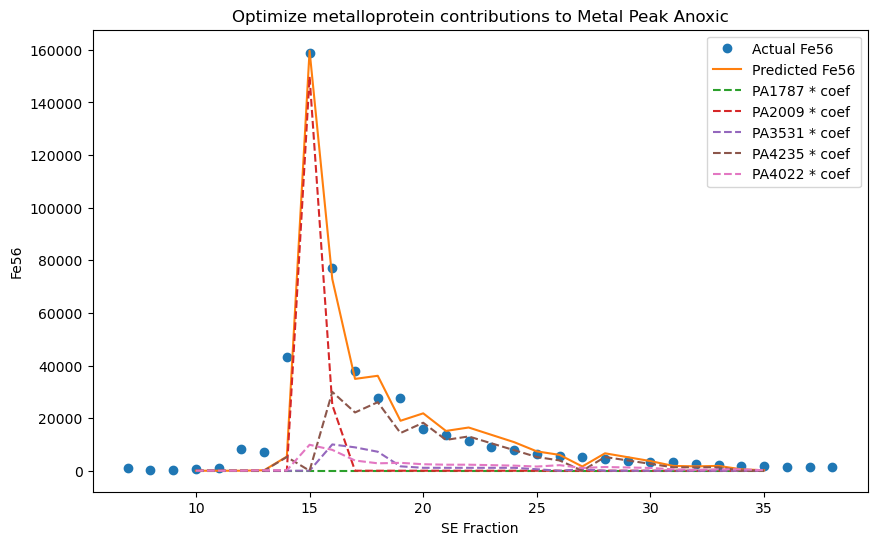

In [41]:
import pandas as pd
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

# Define the data
data = {
    "AE Fraction": [400.0] * 32,
    "SE Fraction": [7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0],
    "PA1787": [np.nan, np.nan, np.nan, 6.0, 6.0, 6.0, 6.0, 4.0, 19.0, 197.0, 228.0, 155.0, 100.0, 76.0, 62.0, 65.0, 62.0, 55.0, 44.0, 42.0, 34.0, 40.0, 44.0, 30.0, 25.0, 21.0, 23.0, 21.0, 18.0, np.nan, np.nan, np.nan],
    "PA2009": [np.nan, np.nan, np.nan, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.nan, np.nan, np.nan],
    "PA3531": [np.nan, np.nan, np.nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.0, 16.0, 13.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.nan, np.nan, np.nan],
    "PA4235": [np.nan, np.nan, np.nan, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 23.0, 17.0, 20.0, 11.0, 14.0, 9.0, 10.0, 8.0, 6.0, 4.0, 3.0, 0.0, 4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, np.nan, np.nan, np.nan],
    "PA4022": [np.nan, np.nan, np.nan, 0.0, 0.0, 0.0, 1.0, 1.0, 56.0, 45.0, 22.0, 16.0, 17.0, 14.0, 13.0, 13.0, 12.0, 11.0, 9.0, 12.0, 6.0, 8.0, 7.0, 6.0, 3.0, 2.0, 3.0, 3.0, 1.0, np.nan, np.nan, np.nan],
    "Fe56": [1109.582030, 448.294511, 449.887975, 560.126705, 966.749720, 8238.015220, 7029.300421, 43064.617376, 158955.653417, 77158.950438, 37868.186735, 27465.474949, 27472.428246, 15796.249083, 13673.465446, 11286.891104, 9076.032371, 7744.331131, 6361.494186, 5497.402171, 5266.784486, 4388.496156, 3774.722834, 3443.572063, 3172.248619, 2664.368216, 2076.235176, 1880.239116, 1678.014061, 1546.046278, 1402.344806, 1362.363348]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define the objective function to minimize
def objective(x):
    return np.nansum((x[0]*df['PA1787'] + x[1]*df['PA2009'] + x[2]*df['PA3531'] + x[3]*df['PA4235'] + x[4]*df['PA4022'] - df['Fe56'])**2)

# Initial guess for the coefficients
x0 = [1, 1, 1, 1, 1]

# Define bounds to ensure non-negative coefficients
bounds = [(0, None), (0, None), (0, None), (0, None), (0, None)]

# Perform the optimization
result = minimize(objective, x0, method='L-BFGS-B', bounds=bounds)

# Print the optimized coefficients
print("Optimized coefficients:", result.x)

# Calculate the predicted Fe56 values using the optimized coefficients
predicted_Fe56 = result.x[0]*df['PA1787'] + result.x[1]*df['PA2009'] + result.x[2]*df['PA3531'] + result.x[3]*df['PA4235'] + result.x[4]*df['PA4022']

# Calculate the percent contribution of each protein to the Fe56 peak
total_contribution = np.nansum(predicted_Fe56)
percent_contributions = {
    'PA1787': np.nansum(result.x[0]*df['PA1787']) / total_contribution * 100,
    'PA2009': np.nansum(result.x[1]*df['PA2009']) / total_contribution * 100,
    'PA3531': np.nansum(result.x[2]*df['PA3531']) / total_contribution * 100,
    'PA4235': np.nansum(result.x[3]*df['PA4235']) / total_contribution * 100,
    'PA4022': np.nansum(result.x[4]*df['PA4022']) / total_contribution * 100
}

print("Percent contributions of each protein to the Fe56 peak:")
for protein, contribution in percent_contributions.items():
    print(f"{protein}: {contribution:.2f}%")

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(df['SE Fraction'], df['Fe56'], 'o', label='Actual Fe56')
plt.plot(df['SE Fraction'], predicted_Fe56, '-', label='Predicted Fe56')

# Plot individual proteins after being multiplied by their coefficients
plt.plot(df['SE Fraction'], result.x[0]*df['PA1787'], '--', label='PA1787 * coef')
plt.plot(df['SE Fraction'], result.x[1]*df['PA2009'], '--', label='PA2009 * coef')
plt.plot(df['SE Fraction'], result.x[2]*df['PA3531'], '--', label='PA3531 * coef')
plt.plot(df['SE Fraction'], result.x[3]*df['PA4235'], '--', label='PA4235 * coef')
plt.plot(df['SE Fraction'], result.x[4]*df['PA4022'], '--', label='PA4022 * coef')

plt.xlabel('SE Fraction')
plt.ylabel('Fe56')
plt.legend()
plt.title('Optimize metalloprotein contributions to Metal Peak Anoxic')
plt.show()

In [42]:
debugged version

SyntaxError: invalid syntax (3611490297.py, line 1)

In [ ]:
### version for oxic proteins

In [ ]:
### different approach to optimization

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from scipy.optimize import minimize
from sklearn.metrics import r2_score

# Sample data for demonstration purposes
data = {
    'AE Fraction': [400.0] * 12,
    'SE Fraction': [7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0],
    'PA1787': [float('nan'), float('nan'), float('nan'), 6, 6, 6, 6, 4, 19, 197, 228, 930],
    'PA2009': [float('nan'), float('nan'), float('nan'), 0, 0, 0, 0, 0, 6, 1, 0, 0],
    'PA3531': [float('nan'), float('nan'), float('nan'), 0, 0, 0, 0, 0, 0, 18, 16, 13],
    'PA4235': [float('nan'), float('nan'), float('nan'), 0, 0, 0, 0, 4, 0, 23, 17, 20],
    'Fe 56': [109.853006, -19.322896, 38.144333, -18.821437, 83.877417, 1830.058804,
              5893.082203, 40545.019340, 30871.569601, 18180.538701,
              15084.328730, 8396.165999]
}

# Create a DataFrame
df_ao = pd.DataFrame(data)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = ['Fe 56']

# Create Dropdown Menus
ae_fraction_unique_ao = sorted(df_ao['AE Fraction'].dropna().unique())
se_fraction_unique_ao = sorted(df_ao['SE Fraction'].dropna().unique())

ae_dropdown_ao = widgets.Dropdown(
    options=ae_fraction_unique_ao,
    value=400.0,
    description='AE Fraction:',
    disabled=False,
)
se_dropdown_ao = widgets.Dropdown(
    options=se_fraction_unique_ao,
    description='SE Fraction:',
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  
    value='Fe 56', 
    description='Metal:',
    disabled=False,
)

# Sort protein columns in sequential order (e.g., PA0001, PA0002, ...)
protein_columns = sorted([col for col in df_ao.columns if col.startswith('PA')])
protein_columns.insert(0, '<no protein>')

# Define the function to display the table
def display_table(protein1, protein2, protein3, protein4):
    ae_fraction = ae_dropdown_ao.value
    metal = metal_dropdown.value
    
    # Filter data for the specified AE fraction
    filtered_data = df_ao[df_ao['AE Fraction'] == ae_fraction].copy()
    
    # Select the columns for the specified proteins and SE Fraction
    selected_columns = ['AE Fraction', 'SE Fraction']
    
    # Add selected proteins to the columns if they are not '<no protein>'
    proteins = []
    if protein1 != '<no protein>':
        if protein1 in filtered_data.columns:
            selected_columns.append(protein1)
            proteins.append(protein1)
        else:
            filtered_data.loc[:, protein1] = float('nan')
    if protein2 != '<no protein>':
        if protein2 in filtered_data.columns:
            selected_columns.append(protein2)
            proteins.append(protein2)
        else:
            filtered_data.loc[:, protein2] = float('nan')
    if protein3 != '<no protein>':
        if protein3 in filtered_data.columns:
            selected_columns.append(protein3)
            proteins.append(protein3)
        else:
            filtered_data.loc[:, protein3] = float('nan')
    if protein4 != '<no protein>':
        if protein4 in filtered_data.columns:
            selected_columns.append(protein4)
            proteins.append(protein4)
        else:
            filtered_data.loc[:, protein4] = float('nan')
    
    # Display the table without the index column
    table_to_display = filtered_data[selected_columns].reset_index(drop=True)
    
    # Add a column that sums the four proteins
    if proteins:
        table_to_display['Sum'] = table_to_display[proteins].sum(axis=1, skipna=True)
    
    # Add metal data for the relevant AE fraction and multiply by 1000
    metal_data = df_ao[df_ao['AE Fraction'] == ae_fraction][['SE Fraction', metal]].reset_index(drop=True)
    metal_data[metal] *= 1000
    table_to_display = pd.merge(table_to_display, metal_data, on='SE Fraction', how='left')
    
    # Calculate optimization scalars and add a new column for sum of optimization values
    scalars = best_fit_scalars(protein1, protein2, protein3, protein4)
    
    for i, protein in enumerate(proteins):
        table_to_display[f'{protein}_opt'] = table_to_display[protein] * scalars[i]
    
    table_to_display['Sum_opt'] = table_to_display[[f'{protein}_opt' for protein in proteins]].sum(axis=1, skipna=True)
    
    # Calculate R-squared value for statistical fit information
    r_squared = r2_score(table_to_display[metal], table_to_display['Sum_opt'])
    
    display(table_to_display)
    
    print("Best fit scalars:", scalars)
    print("R-squared value:", r_squared)

# Function to calculate the best fit scalars using optimization
def best_fit_scalars(protein1, protein2, protein3, protein4):
    ae_fraction = ae_dropdown_ao.value
    metal = metal_dropdown.value
    
    # Filter data for the specified AE fraction
    filtered_data = df_ao[df_ao['AE Fraction'] == ae_fraction].copy()
    
    # Select the columns for the specified proteins and SE Fraction
    proteins = []
    if protein1 != '<no protein>':
        if protein1 in filtered_data.columns:
            proteins.append(protein1)
        else:
            filtered_data.loc[:, protein1] = float('nan')
    if protein2 != '<no protein>':
        if protein2 in filtered_data.columns:
            proteins.append(protein2)
        else:
            filtered_data.loc[:, protein2] = float('nan')
    if protein3 != '<no protein>':
        if protein3 in filtered_data.columns:
            proteins.append(protein3)
        else:
            filtered_data.loc[:, protein3] = float('nan')
    if protein4 != '<no protein>':
        if protein4 in filtered_data.columns:
            proteins.append(protein4)
        else:
            filtered_data.loc[:, protein4] = float('nan')
    
    # Get the metal data for the relevant AE fraction and multiply by 1000
    metal_data = df_ao[df_ao['AE Fraction'] == ae_fraction][['SE Fraction', metal]].reset_index(drop=True)
    metal_data[metal] *= 1000
    
    # Merge the filtered data with metal data on SE Fraction
    merged_data = pd.merge(filtered_data[['SE Fraction'] + proteins], metal_data, on='SE Fraction', how='left')
    
    # Define the objective function to minimize (sum of squared differences)
    def objective_function(scalars):
        return ((merged_data[proteins].values @ scalars) - merged_data[metal].values).sum() ** 2
    
    # Initial guess for scalars (all ones)
    initial_guess = [1] * len(proteins)
    
    # Set bounds for the scalars to be between 0 and 10
    bounds = [(0, 10)] * len(proteins)
    
    # Perform optimization to find the best fit scalars
    result = minimize(objective_function, initial_guess, bounds=bounds)
    
    return result.x

# Create dropdown widgets for proteins and AE fraction
protein_dropdown1 = widgets.Dropdown(options=protein_columns, value='PA1787', description='Protein 1:')
protein_dropdown2 = widgets.Dropdown(options=protein_columns, value='PA2009', description='Protein 2:')
protein_dropdown3 = widgets.Dropdown(options=protein_columns, value='PA3531', description='Protein 3:')
protein_dropdown4 = widgets.Dropdown(options=protein_columns, value='PA4235', description='Protein 4:')

# Display Interactive Widgets
widgets.interact(display_table, 
                 protein1=protein_dropdown1, 
                 protein2=protein_dropdown2, 
                 protein3=protein_dropdown3, 
                 protein4=protein_dropdown4)


In [ ]:
# Table to pull protein data from, needs to be improved, doesn't do optimization

import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from scipy.optimize import minimize

# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0, engine='openpyxl')
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0, engine='openpyxl')

# Drop the first two rows
pr_o = pr_o_annot.drop([0, 1])
pr_ao = pr_ao_annot.drop([0, 1])

# Create a dataframe
df_ao = pd.DataFrame(pr_ao)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menus
ae_fraction_unique_ao = sorted(df_ao['AE Fraction'].dropna().unique())
se_fraction_unique_ao = sorted(df_ao['SE Fraction'].dropna().unique())

ae_dropdown_ao = widgets.Dropdown(
    options=ae_fraction_unique_ao,
    value=400.0,
    description='AE Fraction:',
    disabled=False,
)
se_dropdown_ao = widgets.Dropdown(
    options=se_fraction_unique_ao,
    description='SE Fraction:',
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    value='Fe 56', # default to Fe 56
    description='Metal:',
    disabled=False,
)

# Sort protein columns in sequential order (e.g., PA0001, PA0002, ...)
protein_columns = sorted([col for col in df_ao.columns if col.startswith('PA')])
protein_columns.insert(0, '<no protein>')

# Define the function to display the table
def display_table(protein1, protein2, protein3, protein4, ae_fraction, metal, scalar1, scalar2, scalar3, scalar4):
    # Filter data for the specified AE fraction
    filtered_data = df_ao[df_ao['AE Fraction'] == ae_fraction].copy()
    
    # Select the columns for the specified proteins and SE Fraction
    selected_columns = ['AE Fraction', 'SE Fraction']
    
    # Add selected proteins to the columns if they are not '<no protein>'
    proteins = []
    scalars = []
    if protein1 != '<no protein>':
        if protein1 in filtered_data.columns:
            selected_columns.append(protein1)
            proteins.append(protein1)
            scalars.append(scalar1)
        else:
            filtered_data.loc[:, protein1] = float('nan')
    if protein2 != '<no protein>':
        if protein2 in filtered_data.columns:
            selected_columns.append(protein2)
            proteins.append(protein2)
            scalars.append(scalar2)
        else:
            filtered_data.loc[:, protein2] = float('nan')
    if protein3 != '<no protein>':
        if protein3 in filtered_data.columns:
            selected_columns.append(protein3)
            proteins.append(protein3)
            scalars.append(scalar3)
        else:
            filtered_data.loc[:, protein3] = float('nan')
    if protein4 != '<no protein>':
        if protein4 in filtered_data.columns:
            selected_columns.append(protein4)
            proteins.append(protein4)
            scalars.append(scalar4)
        else:
            filtered_data.loc[:, protein4] = float('nan')
    
    # Display the table without the index column
    table_to_display = filtered_data[selected_columns].reset_index(drop=True)
    
    # Multiply each protein column by its corresponding scalar
    for i, protein in enumerate(proteins):
        table_to_display[protein] *= scalars[i]
    
    # Add a column that sums the four proteins
    if proteins:
        table_to_display['Sum'] = table_to_display[proteins].sum(axis=1, skipna=True)
    
    # Add metal data for the relevant AE fraction and multiply by 1000
    #metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction][['SE Fraction', metal]].reset_index(drop=True)
    metal_data = m_anoxic[m_anoxic['AE Fraction'] == ae_fraction][['SE Fraction', metal]].reset_index(drop=True)
    metal_data[metal] *= 1000
    table_to_display = pd.merge(table_to_display, metal_data, on='SE Fraction', how='left')
    
    display(table_to_display)

# Function to calculate the best fit scalars using optimization
def best_fit_scalars(protein1, protein2, protein3, protein4, ae_fraction, metal):
    # Filter data for the specified AE fraction
    filtered_data = df_ao[df_ao['AE Fraction'] == ae_fraction].copy()
    
    # Select the columns for the specified proteins and SE Fraction
    proteins = []
    if protein1 != '<no protein>':
        if protein1 in filtered_data.columns:
            proteins.append(protein1)
        else:
            filtered_data.loc[:, protein1] = float('nan')
    if protein2 != '<no protein>':
        if protein2 in filtered_data.columns:
            proteins.append(protein2)
        else:
            filtered_data.loc[:, protein2] = float('nan')
    if protein3 != '<no protein>':
        if protein3 in filtered_data.columns:
            proteins.append(protein3)
        else:
            filtered_data.loc[:, protein3] = float('nan')
    if protein4 != '<no protein>':
        if protein4 in filtered_data.columns:
            proteins.append(protein4)
        else:
            filtered_data.loc[:, protein4] = float('nan')
    
    # Get the metal data for the relevant AE fraction and multiply by 1000
    metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction][['SE Fraction', metal]].reset_index(drop=True)
    metal_data[metal] *= 1000
    
    # Merge the filtered data with metal data on SE Fraction
    merged_data = pd.merge(filtered_data[['SE Fraction'] + proteins], metal_data, on='SE Fraction', how='left')
    
    # Define the objective function to minimize (sum of squared differences)
    def objective_function(scalars):
        return ((merged_data[proteins].values * scalars).sum(axis=1) - merged_data[metal].values).sum() ** 2
    
    # Initial guess for scalars (all ones)
    initial_guess = [1] * len(proteins)
    
    # Perform optimization to find the best fit scalars
    result = minimize(objective_function, initial_guess)
    
    return result.x

# Create dropdown widgets for proteins and AE fraction
protein_dropdown1 = widgets.Dropdown(options=protein_columns, value='PA1787', description='Protein 1:')
protein_dropdown2 = widgets.Dropdown(options=protein_columns, value='PA2009', description='Protein 2:')
protein_dropdown3 = widgets.Dropdown(options=protein_columns, value='PA3531', description='Protein 3:')
protein_dropdown4 = widgets.Dropdown(options=protein_columns, value='PA4235', description='Protein 4:')

# Create input fields for scalars
scalar1_input = widgets.FloatText(value=1.0, description='Scalar 1:')
scalar2_input = widgets.FloatText(value=1.0, description='Scalar 2:')
scalar3_input = widgets.FloatText(value=1.0, description='Scalar 3:')
scalar4_input = widgets.FloatText(value=1.0, description='Scalar 4:')

# Display Interactive Widgets
widgets.interact(display_table, 
                 protein1=protein_dropdown1, 
                 protein2=protein_dropdown2, 
                 protein3=protein_dropdown3, 
                 protein4=protein_dropdown4, 
                 ae_fraction=ae_dropdown_ao,
                 metal=metal_dropdown,
                 scalar1=scalar1_input,
                 scalar2=scalar2_input,
                 scalar3=scalar3_input,
                 scalar4=scalar4_input)

# Example usage of best_fit_scalars function
scalars = best_fit_scalars('PA1787', 'PA2009', 'PA3531', 'PA4235', 400.0, 'Fe 56')
print("Best fit scalars:", scalars)

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from scipy.optimize import minimize
from sklearn.metrics import r2_score
import numpy as np

# Sample data for demonstration purposes
data = {
    'AE Fraction': [400.0] * 12,
    'SE Fraction': [7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0],
    'PA1787': [float('nan'), float('nan'), float('nan'), 6, 6, 6, 6, 4, 19, 197, 228, 930],
    'PA2009': [float('nan'), float('nan'), float('nan'), 0, 0, 0, 0, 0, 6, 1, 0, 0],
    'PA3531': [float('nan'), float('nan'), float('nan'), 0, 0, 0, 0, 0, 0, 18, 16, 13],
    'PA4235': [float('nan'), float('nan'), float('nan'), 0, 0, 0, 0, 4, 0, 23, 17, 20],
    'Fe 56': [109.853006, -19.322896, 38.144333, -18.821437, 83.877417, 1830.058804,
              5893.082203, 40545.019340, 30871.569601, 18180.538701,
              15084.328730, 8396.165999]
}

# Create a DataFrame
df_ao = pd.DataFrame(data)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = ['Fe 56']

# Create Dropdown Menus
ae_fraction_unique_ao = sorted(df_ao['AE Fraction'].dropna().unique())
se_fraction_unique_ao = sorted(df_ao['SE Fraction'].dropna().unique())

ae_dropdown_ao = widgets.Dropdown(
    options=ae_fraction_unique_ao,
    value=400.0,
    description='AE Fraction:',
    disabled=False,
)
se_dropdown_ao = widgets.Dropdown(
    options=se_fraction_unique_ao,
    description='SE Fraction:',
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  
    value='Fe 56', 
    description='Metal:',
    disabled=False,
)

# Sort protein columns in sequential order (e.g., PA0001, PA0002, ...)
protein_columns = sorted([col for col in df_ao.columns if col.startswith('PA')])
protein_columns.insert(0, '<no protein>')

# Define the function to display the table
def display_table(protein1, protein2, protein3, protein4):
    ae_fraction = ae_dropdown_ao.value
    metal = metal_dropdown.value
    
    # Filter data for the specified AE fraction
    filtered_data = df_ao[df_ao['AE Fraction'] == ae_fraction].copy()
    
    # Select the columns for the specified proteins and SE Fraction
    selected_columns = ['AE Fraction', 'SE Fraction']
    
    # Add selected proteins to the columns if they are not '<no protein>'
    proteins = []
    if protein1 != '<no protein>':
        if protein1 in filtered_data.columns:
            selected_columns.append(protein1)
            proteins.append(protein1)
        else:
            filtered_data.loc[:, protein1] = float('nan')
    if protein2 != '<no protein>':
        if protein2 in filtered_data.columns:
            selected_columns.append(protein2)
            proteins.append(protein2)
        else:
            filtered_data.loc[:, protein2] = float('nan')
    if protein3 != '<no protein>':
        if protein3 in filtered_data.columns:
            selected_columns.append(protein3)
            proteins.append(protein3)
        else:
            filtered_data.loc[:, protein3] = float('nan')
    if protein4 != '<no protein>':
        if protein4 in filtered_data.columns:
            selected_columns.append(protein4)
            proteins.append(protein4)
        else:
            filtered_data.loc[:, protein4] = float('nan')
    
    # Display the table without the index column
    table_to_display = filtered_data[selected_columns].reset_index(drop=True)
    
    # Add a column that sums the four proteins
    if proteins:
        table_to_display['Sum'] = table_to_display[proteins].sum(axis=1, skipna=True)
    
    # Add metal data for the relevant AE fraction
    metal_data = df_ao[df_ao['AE Fraction'] == ae_fraction][['SE Fraction', metal]].reset_index(drop=True)
    table_to_display = pd.merge(table_to_display, metal_data, on='SE Fraction', how='left')
    
    # Calculate optimization scalars and add a new column for sum of optimization values
    scalars = best_fit_scalars(protein1, protein2, protein3, protein4)
    
    for i, protein in enumerate(proteins):
        table_to_display[f'{protein}_opt'] = table_to_display[protein] * scalars[i]
    
    table_to_display['Sum_opt'] = table_to_display[[f'{protein}_opt' for protein in proteins]].sum(axis=1, skipna=True)
    
    # Calculate R-squared value for statistical fit information
    r_squared = r2_score(table_to_display[metal], table_to_display['Sum_opt'])
    
    display(table_to_display)
    
    print("Best fit scalars:", scalars)
    print("R-squared value:", r_squared)

# Function to calculate the best fit scalars using optimization
def best_fit_scalars(protein1, protein2, protein3, protein4):
    ae_fraction = ae_dropdown_ao.value
    metal = metal_dropdown.value
    
    # Filter data for the specified AE fraction
    filtered_data = df_ao[df_ao['AE Fraction'] == ae_fraction].copy()
    
    # Select the columns for the specified proteins and SE Fraction
    proteins = []
    if protein1 != '<no protein>':
        if protein1 in filtered_data.columns:
            proteins.append(protein1)
        else:
            filtered_data.loc[:, protein1] = float('nan')
    if protein2 != '<no protein>':
        if protein2 in filtered_data.columns:
            proteins.append(protein2)
        else:
            filtered_data.loc[:, protein2] = float('nan')
    if protein3 != '<no protein>':
        if protein3 in filtered_data.columns:
            proteins.append(protein3)
        else:
            filtered_data.loc[:, protein3] = float('nan')
    if protein4 != '<no protein>':
        if protein4 in filtered_data.columns:
            proteins.append(protein4)
        else:
            filtered_data.loc[:, protein4] = float('nan')
    
    # Get the metal data for the relevant AE fraction
    metal_data = df_ao[df_ao['AE Fraction'] == ae_fraction][['SE Fraction', metal]].reset_index(drop=True)
    
    # Merge the filtered data with metal data on SE Fraction
    merged_data = pd.merge(filtered_data[['SE Fraction'] + proteins], metal_data, on='SE Fraction', how='left')
    
    # Remove rows with NaN values
    merged_data = merged_data.dropna()
    
    # Define the objective function to minimize (sum of squared differences)
    def objective_function(scalars):
        residuals = (merged_data[proteins].values @ scalars) - merged_data[metal].values
        return (residuals ** 2).sum()
    
    # Initial guess for scalars (all ones)
    initial_guess = [1] * len(proteins)
    
    # Set bounds for the scalars to be between 0 and 100
    bounds = [(0, 100)] * len(proteins)
    
    # Perform optimization to find the best fit scalars
    result = minimize(objective_function, initial_guess, bounds=bounds)
    
    # Debugging: Print the result of the optimization
    print("Optimization result:", result)
    
    return result.x

# Create dropdown widgets for proteins and AE fraction
protein_dropdown1 = widgets.Dropdown(options=protein_columns, value='PA1787', description='Protein 1:')
protein_dropdown2 = widgets.Dropdown(options=protein_columns, value='PA2009', description='Protein 2:')
protein_dropdown3 = widgets.Dropdown(options=protein_columns, value='PA3531', description='Protein 3:')
protein_dropdown4 = widgets.Dropdown(options=protein_columns, value='PA4235', description='Protein 4:')

# Display Interactive Widgets
widgets.interact(display_table, 
                 protein1=protein_dropdown1, 
                 protein2=protein_dropdown2, 
                 protein3=protein_dropdown3, 
                 protein4=protein_dropdown4)

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from scipy.optimize import minimize
from sklearn.metrics import r2_score

# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0, engine='openpyxl')
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0, engine='openpyxl')

# Drop the first two rows
pr_o = pr_o_annot.drop([0, 1])
pr_ao = pr_ao_annot.drop([0, 1])

# Create a dataframe
df_ao = pd.DataFrame(pr_ao)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menus
ae_fraction_unique_ao = sorted(df_ao['AE Fraction'].dropna().unique())
se_fraction_unique_ao = sorted(df_ao['SE Fraction'].dropna().unique())

ae_dropdown_ao = widgets.Dropdown(
    options=ae_fraction_unique_ao,
    value=400.0,
    description='AE Fraction:',
    disabled=False,
)
se_dropdown_ao = widgets.Dropdown(
    options=se_fraction_unique_ao,
    description='SE Fraction:',
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    value='Fe 56', # default to Fe 56
    description='Metal:',
    disabled=False,
)

# Sort protein columns in sequential order (e.g., PA0001, PA0002, ...)
protein_columns = sorted([col for col in df_ao.columns if col.startswith('PA')])
protein_columns.insert(0, '<no protein>')

# Define the function to display the table
def display_table(protein1, protein2, protein3, protein4, ae_fraction, metal):
    # Filter data for the specified AE fraction
    filtered_data = df_ao[df_ao['AE Fraction'] == ae_fraction].copy()
    
    # Select the columns for the specified proteins and SE Fraction
    selected_columns = ['AE Fraction', 'SE Fraction']
    
    # Add selected proteins to the columns if they are not '<no protein>'
    proteins = []
    if protein1 != '<no protein>':
        if protein1 in filtered_data.columns:
            selected_columns.append(protein1)
            proteins.append(protein1)
        else:
            filtered_data.loc[:, protein1] = float('nan')
    if protein2 != '<no protein>':
        if protein2 in filtered_data.columns:
            selected_columns.append(protein2)
            proteins.append(protein2)
        else:
            filtered_data.loc[:, protein2] = float('nan')
    if protein3 != '<no protein>':
        if protein3 in filtered_data.columns:
            selected_columns.append(protein3)
            proteins.append(protein3)
        else:
            filtered_data.loc[:, protein3] = float('nan')
    if protein4 != '<no protein>':
        if protein4 in filtered_data.columns:
            selected_columns.append(protein4)
            proteins.append(protein4)
        else:
            filtered_data.loc[:, protein4] = float('nan')
    
    # Display the table without the index column
    table_to_display = filtered_data[selected_columns].reset_index(drop=True)
    
    # Add a column that sums the four proteins
    if proteins:
        table_to_display['Sum'] = table_to_display[proteins].sum(axis=1, skipna=True)
    
    # Add metal data for the relevant AE fraction and multiply by 1000
    metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction][['SE Fraction', metal]].reset_index(drop=True)
    metal_data[metal] *= 1000
    table_to_display = pd.merge(table_to_display, metal_data, on='SE Fraction', how='left')
    
    # Calculate optimization scalars and add a new column for sum of optimization values
    scalars = best_fit_scalars(protein1, protein2, protein3, protein4, ae_fraction, metal)
    
    for i, protein in enumerate(proteins):
        table_to_display[f'{protein}_opt'] = table_to_display[protein] * scalars[i]
    
    table_to_display['Sum_opt'] = table_to_display[[f'{protein}_opt' for protein in proteins]].sum(axis=1, skipna=True)
    
    # Calculate R-squared value for statistical fit information
    r_squared = r2_score(table_to_display[metal], table_to_display['Sum_opt'])
    
    display(table_to_display)
    
    print("Best fit scalars:", scalars)
    print("R-squared value:", r_squared)

# Function to calculate the best fit scalars using optimization
def best_fit_scalars(protein1, protein2, protein3, protein4, ae_fraction, metal):
    # Filter data for the specified AE fraction
    filtered_data = df_ao[df_ao['AE Fraction'] == ae_fraction].copy()
    
    # Select the columns for the specified proteins and SE Fraction
    proteins = []
    if protein1 != '<no protein>':
        if protein1 in filtered_data.columns:
            proteins.append(protein1)
        else:
            filtered_data.loc[:, protein1] = float('nan')
    if protein2 != '<no protein>':
        if protein2 in filtered_data.columns:
            proteins.append(protein2)
        else:
            filtered_data.loc[:, protein2] = float('nan')
    if protein3 != '<no protein>':
        if protein3 in filtered_data.columns:
            proteins.append(protein3)
        else:
            filtered_data.loc[:, protein3] = float('nan')
    if protein4 != '<no protein>':
        if protein4 in filtered_data.columns:
            proteins.append(protein4)
        else:
            filtered_data.loc[:, protein4] = float('nan')
    
    # Get the metal data for the relevant AE fraction and multiply by 1000
    metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction][['SE Fraction', metal]].reset_index(drop=True)
    metal_data[metal] *= 1000
    
    # Merge the filtered data with metal data on SE Fraction
    merged_data = pd.merge(filtered_data[['SE Fraction'] + proteins], metal_data, on='SE Fraction', how='left')
    
    # Define the objective function to minimize (sum of squared differences)
    def objective_function(scalars):
        return ((merged_data[proteins].values * scalars).sum(axis=1) - merged_data[metal].values).sum() ** 2
    
    # Initial guess for scalars (all ones)
    initial_guess = [1] * len(proteins)
    
    # Set bounds for the scalars to be between 0 and 10
    bounds = [(0, 10)] * len(proteins)
    
    # Perform optimization to find the best fit scalars
    result = minimize(objective_function, initial_guess, bounds=bounds)
    
    return result.x

# Create dropdown widgets for proteins and AE fraction
protein_dropdown1 = widgets.Dropdown(options=protein_columns, value='PA1787', description='Protein 1:')
protein_dropdown2 = widgets.Dropdown(options=protein_columns, value='PA2009', description='Protein 2:')
protein_dropdown3 = widgets.Dropdown(options=protein_columns, value='PA3531', description='Protein 3:')
protein_dropdown4 = widgets.Dropdown(options=protein_columns, value='PA4235', description='Protein 4:')

# Display Interactive Widgets
widgets.interact(display_table, 
                 protein1=protein_dropdown1, 
                 protein2=protein_dropdown2, 
                 protein3=protein_dropdown3, 
                 protein4=protein_dropdown4, 
                 ae_fraction=ae_dropdown_ao,
                 metal=metal_dropdown)

###  5b. Line plot of 1 protein and metal, select AE fraction 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots

# Reading the Excel file and specific sheets
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0)
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0)
pr_o = pr_o_annot.drop([0, 1])

# Setting the first column (Sample_ID) as the index for metals data
m_oxic.set_index('Sample_ID', inplace=True)

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    options=sorted(pa_columns),  # Sort the PA#### columns
    description='Protein:',
    disabled=False,
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    description='Metal:',
    disabled=False,
)

# pull and sort AE fractions from input df
ae_fraction_unique = sorted(df['AE Fraction'].dropna().unique())
# Remove decimal places and convert to integers
ae_fraction_unique = [int(val) for val in ae_fraction_unique]
ae_dropdown = widgets.Dropdown(
    options=ae_fraction_unique,
    description='AE Fraction:',
    disabled=False,
)

# Define Plotting Function
def plot_data(protein, metal, ae_fraction):
    
    # Filter data for the specified AE fraction
    protein_data = pr_o[pr_o['AE Fraction'] == ae_fraction]
    metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction]

    # Create a line plot with X: SE Fraction, Y: PA4266, Y2: Fe 56 using seaborn
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot Protein
    sns.lineplot(data=protein_data, x='SE Fraction', y=protein, marker='o', ax=ax1, label=protein)
    ax1.set_xlabel('SE Fraction')
    ax1.set_ylabel('Spectral Counts')
    ax1.legend(loc='upper left')

    # Create a secondary y-axis for metal
    ax2 = ax1.twinx()
    sns.lineplot(data=metal_data, x='SE Fraction', y=metal, marker='o', ax=ax2, color='b', label=metal)
    ax2.set_ylabel('metal')
    ax2.legend(loc='upper right')

    # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_o_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
    # Combine the gene id# and annotation 
    combined_text = f"{protein} - {processed_text} (oxic)"

    # Add a title
    plt.title(f"AE Fraction {ae_fraction} {processed_text}")

    # Show the plot
    plt.show()

    
# Display Interactive Widgets
widgets.interact(plot_data, protein=protein_dropdown, metal=metal_dropdown, ae_fraction=ae_dropdown)

### 5c. Line plot of protein and metal, select AE fraction (all SE fractions, anoxic)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots
                                        
# Reading the Excel file and specific sheets
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0)
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0)
pr_o = pr_o_annot.drop([0, 1])

raw_annotation = pr_ao_annot[col].iloc[1]
# Strip off the text before pipe '|'
processed_text = raw_annotation.split('|')[-1].strip()

# Anoxic data
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0)
pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
pr_ao = pr_ao_annot.drop([0, 1])

# Setting the first column (Sample_ID) as the index for metals data
m_oxic.set_index('Sample_ID', inplace=True)
m_anoxic.set_index('Sample_ID', inplace=True)

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]
pa_columns_ao = [col for col in pr_ao.columns if col.startswith('PA')]

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])
  
# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    options=sorted(pa_columns_ao),  # Sort the PA#### columns
    description='Protein:',
    disabled=False,
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns_ao),  # Sort the metal columns
    description='Metal:',
    disabled=False,
)

# pull and sort AE fractions from input df
ae_fraction_unique = sorted(df['AE Fraction'].dropna().unique())
# Remove decimal places and convert to integers
ae_fraction_unique = [int(val) for val in ae_fraction_unique]
ae_dropdown = widgets.Dropdown(
    options=ae_fraction_unique,
    description='AE Fraction:',
    disabled=False,
)

# Define Plotting Function
def plot_data(protein, metal, ae_fraction):
    
    # Filter data for the specified AE fraction
    protein_data = pr_ao[pr_ao['AE Fraction'] == ae_fraction]
    metal_data = m_anoxic[m_anoxic['AE Fraction'] == ae_fraction]

    # Create a line plot with X: SE Fraction, Y: PA4266, Y2: Fe 56 using seaborn
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_ao_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
    # Combine the gene id# and annotation 
    combined_text = f"{protein} - {processed_text} (anoxic)"
    
    # Plot Protein
    sns.lineplot(data=protein_data, x='SE Fraction', y=protein, marker='o', ax=ax1, label=protein)
    ax1.set_xlabel('SE Fraction')
    ax1.set_ylabel('Spectral Counts')
    ax1.legend(loc='upper left')

    # Create a secondary y-axis for metal
    ax2 = ax1.twinx()
    sns.lineplot(data=metal_data, x='SE Fraction', y=metal, marker='o', ax=ax2, color='b', label=metal)
    ax2.set_ylabel('metal')
    ax2.legend(loc='upper right')

    # Add a title
    plt.title(f"AE Fraction {ae_fraction} {processed_text}")
    # Show the plot
    plt.show()

    
# Display Interactive Widgets
widgets.interact(plot_data, protein=protein_dropdown, metal=metal_dropdown, ae_fraction=ae_dropdown)

### 5d. two protein line figure - working need to make anoxic version

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots

# Reading the Excel file and specific sheets
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0)
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0)
pr_o = pr_o_annot.drop([0, 1])

# Setting the first column (Sample_ID) as the index for metals data
m_oxic.set_index('Sample_ID', inplace=True)

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    options=sorted(pa_columns),  # Sort the PA#### columns
    description='Protein 1:',
    disabled=False,
)

protein_dropdown2 = widgets.Dropdown(
    options=sorted(pa_columns),  # Sort the PA#### columns
    description='Protein 2:',
    disabled=False,
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    value='Fe 56', # default to Fe 56
    description='Metal:',
    disabled=False,
)

ae_dropdown = widgets.Dropdown(
    options=[100, 200, 300, 400, 500, 600], # temp values
    value=300, # default to 300
    description='AE Fraction:',
    disabled=False,
)

# Define Plotting Function
def plot_data(protein, protein2, metal, ae_fraction):
    
    # Filter data for the specified AE fraction
    protein_data = pr_o[pr_o['AE Fraction'] == ae_fraction]
    metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction]

    # Create line plot and set size
    fig, ax1 = plt.subplots(figsize=(6, 6))
    
   # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_o_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
   # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation2 = pr_o_annot[protein2].iloc[1]
    # clean up annotation, strip off the text before pipe '|'
    processed_text2 = raw_annotation2.split('|')[-1].strip()
    
    # Plot Protein Abundance
    sns.lineplot(data=protein_data, x='SE Fraction', y=protein, marker='o', ax=ax1, label=f"{protein} {processed_text})")
    sns.lineplot(data=protein_data, x='SE Fraction', y=protein2, marker='o', ax=ax1, label=f"{protein2} {processed_text2})")
    ax1.set_xlabel('SE Fraction')
    ax1.set_ylabel('Spectral Counts')
    ax1.legend(loc='upper left')

    # Create a secondary y-axis for metal
    ax2 = ax1.twinx()
    sns.lineplot(data=metal_data, x='SE Fraction', y=metal, marker='o', ax=ax2, color='b', label=metal)
    ax2.set_ylabel('Metal Abundance')
    ax2.legend(loc='upper right')
    
    # Add a title
    plt.title(f"AE Fraction {ae_fraction}")
    
    # Show the plot
    plt.show()
    
# Display Interactive Widgets
widgets.interact(plot_data, protein=protein_dropdown, protein2=protein_dropdown2, metal=metal_dropdown, ae_fraction=ae_dropdown)

### 5e. 3 line plot selector, working oxic only

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots

# Reading the Excel file and specific sheets
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0, engine='openpyxl')
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_o = pr_o_annot.drop([0, 1])

# Setting the first column (Sample_ID) as the index for metals data
m_oxic.set_index('Sample_ID', inplace=True)

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    options=sorted(pa_columns),  # Sort the PA#### columns
    description='Protein 1:',
    disabled=False,
)

protein_dropdown2 = widgets.Dropdown(
    options=['None'] + sorted(pa_columns),  # Add 'None' option and sort the PA#### columns
    description='Protein 2:',
    disabled=False,
)

protein_dropdown3 = widgets.Dropdown(
    options=['None'] + sorted(pa_columns),  # Add 'None' option and sort the PA#### columns
    description='Protein 3:',
    disabled=False,
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    value='Fe 56', # default to Fe 56
    description='Metal:',
    disabled=False,
)

ae_dropdown = widgets.Dropdown(
    options=[100, 200, 300, 400, 500, 600], # temp values
    value=300, # default to 300
    description='AE Fraction:',
    disabled=False,
)
y_offset_dropdown = widgets.Dropdown(
    options=[1, 1.15, 1.23],
    value=1.23, # default 
    description='Y axis offset:',
    disabled=False,
)

# Define Plotting Function
def plot_data(protein, protein2, protein3, metal, ae_fraction, y_offset):
    
    # Filter data for the specified AE fraction
    protein_data = pr_o[pr_o['AE Fraction'] == ae_fraction]
    metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction]

    # Create line plot and set size
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_o_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
    
    # Plot Protein Abundance for Protein 1
    sns.lineplot(data=protein_data, x='SE Fraction', y=protein, marker='o', ax=ax1, label=f"{protein} ({processed_text})")
    
    if protein2 != 'None':
        # Pull protein annotation (pull text from the widget defined protein header)
        raw_annotation2 = pr_o_annot[protein2].iloc[1]
        # clean up annotation, strip off the text before pipe '|'
        processed_text2 = raw_annotation2.split('|')[-1].strip()
        
        # Plot Protein Abundance for Protein 2
        sns.lineplot(data=protein_data, x='SE Fraction', y=protein2, marker='o', ax=ax1, label=f"{protein2} ({processed_text2})")
    
    if protein3 != 'None':
        # Pull protein annotation (pull text from the widget defined protein header)
        raw_annotation3 = pr_o_annot[protein3].iloc[1]
        # clean up annotation, strip off the text before pipe '|'
        processed_text3 = raw_annotation3.split('|')[-1].strip()
        
        # Plot Protein Abundance for Protein 3
        sns.lineplot(data=protein_data, x='SE Fraction', y=protein3, marker='o', ax=ax1, label=f"{protein3} ({processed_text3})")
    
    #ax1.set_xlabel('SE Fraction')
    ax1.set_xlabel(f"SE Fraction along AE Fraction {ae_fraction}")
    ax1.set_ylabel('Protein Spectral Counts')
    
    # Adjust y-axis limit to add extra above the data for legend space
    max_y_value = max(protein_data[[protein] + ([protein2] if protein2 != 'None' else []) + ([protein3] if protein3 != 'None' else [])].max())
    ax1.set_ylim(0, max_y_value * y_offset)
    ax1.legend(loc='upper left')

    # Create a secondary y-axis for metal
    ax2 = ax1.twinx()
    sns.lineplot(data=metal_data, x='SE Fraction', y=metal, marker='.', ax=ax2, color='b', label=metal)
    ax2.set_ylabel('Metal Abundance')
    
    # Adjust y-axis limit to add extra above the data for legend space on secondary axis
    max_y_value_metal = metal_data[metal].max()
    ax2.set_ylim(0, max_y_value_metal * y_offset)
    
    ax2.legend(loc='upper right')
    
    # Add a title
    #plt.title(f"AE Fraction {ae_fraction}")
    
    # Show the plot
    plt.show()
    
# Display Interactive Widgets
widgets.interact(plot_data, ae_fraction=ae_dropdown, metal=metal_dropdown, protein=protein_dropdown,
                 protein2=protein_dropdown2, protein3=protein_dropdown3, y_offset=y_offset_dropdown)


### 6. Specific Protein Plots 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Excel file and specific sheets
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0)
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0)
pr_o = pr_o_annot.drop([0, 1])

# Setting the first column (Sample_ID) as the index for metals data
m_oxic.set_index('Sample_ID', inplace=True)

# Define the AE fraction parameter
ae_fraction = 300

# Filter data for the specified AE fraction
protein_data = pr_o[pr_o['AE Fraction'] == ae_fraction]
metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction]

# Create a line plot with X: SE Fraction, Y: PA4266, Y2: Fe 56 using seaborn
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PA4266 (Protein Abundance)
sns.lineplot(data=protein_data, x='SE Fraction', y='PA1787', marker='o', ax=ax1, label='PA1787 aconitate hydratase 2') #label='PA4880'
ax1.set_xlabel('SE Fraction')
#ax1.set_ylabel('PA1787 (Protein Abundance)')
#ax1.legend(loc='upper left')
sns.lineplot(data=protein_data, x='SE Fraction', y='PA4366', marker='o', ax=ax1, label='PA4366 superoxide dismutase') #label='PA4880'
ax1.set_xlabel('SE Fraction')
ax1.set_ylabel('Protein Abundance')
ax1.legend(loc='upper left')

# Create a secondary y-axis for Fe 56
ax2 = ax1.twinx()
sns.lineplot(data=metal_data, x='SE Fraction', y='Fe 56', marker='o', ax=ax2, color='r', label='Fe 56')
ax2.set_ylabel('Fe 56')
ax2.legend(loc='upper right')

# Add a title
plt.title(f"Line Plot for AE Fraction {ae_fraction}")

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Excel file and specific sheets
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0)
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0)
pr_o = pr_o_annot.drop([0, 1])

# Setting the first column (Sample_ID) as the index for metals data
m_oxic.set_index('Sample_ID', inplace=True)

# Define the AE fraction parameter
ae_fraction = 400

# Filter data for the specified AE fraction
protein_data = pr_o[pr_o['AE Fraction'] == ae_fraction]
metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction]

# Create a line plot with X: SE Fraction, Y: PA4266, Y2: Fe 56 using seaborn
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PA4266 (Protein Abundance)
sns.lineplot(data=protein_data, x='SE Fraction', y='PA1787', marker='o', ax=ax1, label='PA1787 aconitate hydratase 2') #label='PA4880'
ax1.set_xlabel('SE Fraction')
#ax1.set_ylabel('PA1787 (Protein Abundance)')
#ax1.legend(loc='upper left')
sns.lineplot(data=protein_data, x='SE Fraction', y='PA4366', marker='o', ax=ax1, label='PA4366 superoxide dismutase') #label='PA4880'
ax1.set_xlabel('SE Fraction')
ax1.set_ylabel('Protein Abundance')
ax1.legend(loc='upper left')

sns.lineplot(data=protein_data, x='SE Fraction', y='PA4235', marker='o', ax=ax1, label='PA4235 Bacterial Ferritin') #label='PA4880'
ax1.set_xlabel('SE Fraction')
ax1.set_ylabel('Protein Abundance')
ax1.legend(loc='upper left')
sns.lineplot(data=protein_data, x='SE Fraction', y='PA3531', marker='o', ax=ax1, label='PA3531 bacterioferritin') #label='PA4880'
ax1.set_xlabel('SE Fraction')
ax1.set_ylabel('Protein Abundance')
ax1.legend(loc='upper left')

# Create a secondary y-axis for Fe 56
ax2 = ax1.twinx()
sns.lineplot(data=metal_data, x='SE Fraction', y='Fe 56', marker='+', ax=ax2, color='r', label='Fe 56')
ax2.set_ylabel('Fe 56')
ax2.legend(loc='upper right')

# Add a title
plt.title(f"Line Plot for AE Fraction {ae_fraction}")

# Show the plot
plt.show()
